---

**<font color="green">Комментарий ревьюера V2</font>**

Привет! Спасибо за доработку задания


---


---

**<font color="green">Комментарий ревьюера</font>**

Привет, Аркадия! Спасибо тебе за выполненное задание!
Меня зовут Горленко Екатерина, я буду проверять твою работу.

По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Постарайся учесть эти комментарии для дальнейших проектов.

Пожалуйста, не удаляй комментарии.

---

Я буду красить комментарии цветом:

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---


# Помочь маркетологам оптимизировать маркетинговые затраты.

## План исследования:
### 1. Загрузите данные и подготовить их к анализу  
### 2. Построить отчёты и посчитать метрики  
   #### Продукт  
    Сколько людей пользуются в день, неделю, месяц?
    Сколько сессий в день?
    Сколько длится одна сессия?
    Как часто люди возвращаются?
   #### Продажи
    Когда люди начинают покупать?
    Сколько раз покупают за период?
    Какой средний чек?
    Сколько денег приносят? (LTV)
   #### Маркетинг
    Сколько денег потратили? Всего / на каждый источник / по времени
    Сколько стоило привлечение одного покупателя из каждого источника?
    На сколько окупились расходы? (ROI)
Отобразить на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?
### 3. Порекомендовать маркетологам, куда и сколько им стоит вкладывать денег

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Загрузить данные и подготовить их к анализу

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

### 1.1. Таблица visits

In [3]:
visits.head(10)

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9   1289240080042562063

visits (лог сервера с информацией о посещениях сайта):  
Uid — уникальный идентификатор пользователя  
Device — категория устройства пользователя  
Start Ts — дата и время начала сессии  
End Ts — дата и время окончания сессии  
Source Id — идентификатор рекламного источника, из которого пришел пользователь  

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В даннных нет пропусков, для дальнейшего удобства работы можно привести время к соответствующему типу

In [5]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [6]:
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


### 1.2. Таблица orders

In [7]:

orders.columns = ['buy_ts', 'revenue', 'uid']
orders.head(10)

buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382

orders (информация о заказах):  
Uid — уникальный id пользователя, который сделал заказ  
Buy Ts — дата и время заказа  
Revenue — выручка Яндекс.Афиши с этого заказа  

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### 1.3. Таблица costs

In [10]:
costs.head(10)

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24

costs (информация о затратах на маркетинг):  
source_id — идентификатор рекламного источника  
dt — дата  
costs — затраты на этот рекламный источник в этот день  

In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])

Так мы загрузили данные и привели, где нужно формат даты к корректному. Перевели названия колонок в нижний регистр

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Тут все хорошо, двигаемся дальше :). Можно еще проверить данные на дубликаты
</div>

---


# 2. Построить отчёты и посчитать метрики

## 2.1 Продукт  
Сколько людей пользуются в день, неделю, месяц?  
Сколько сессий в день?  
Сколько длится одна сессия?  
Как часто люди возвращаются?  

### 2.1.1. Продукт. Сколько людей пользуются в день, неделю, месяц?

Добавим колонки с соответствующими периодами:

In [13]:
visits['session_month'] = visits['start_ts'].astype('datetime64[M]') 
visits['session_week']  = visits['start_ts'].astype('datetime64[W]') 
visits['session_date'] = visits['start_ts'].astype('datetime64[D]') 

Построим общие временные графики посещений

In [14]:
data_mau = visits.groupby(['session_month']).agg({'uid': 'nunique'}).reset_index()
data_wau = visits.groupby(['session_week']).agg({'uid': 'nunique'}).reset_index()
data_dau = visits.groupby(['session_date']).agg({'uid': 'nunique'}).reset_index()


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


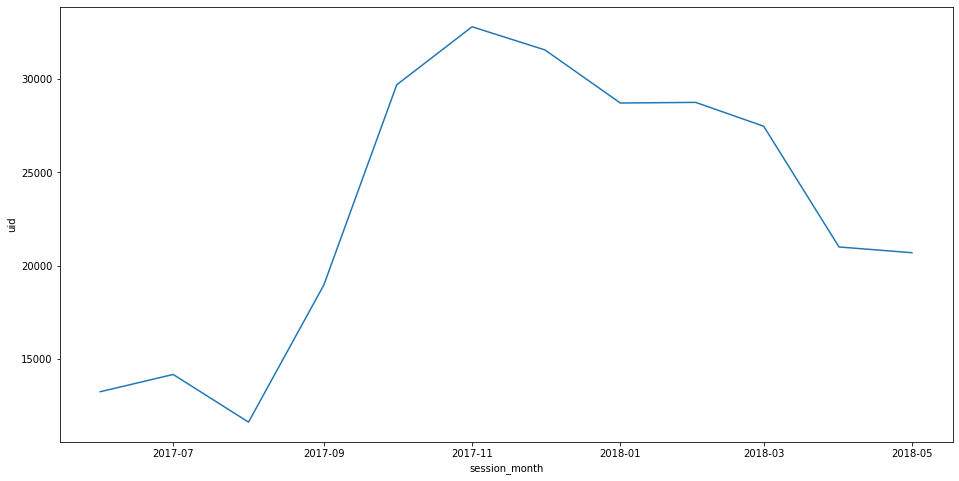

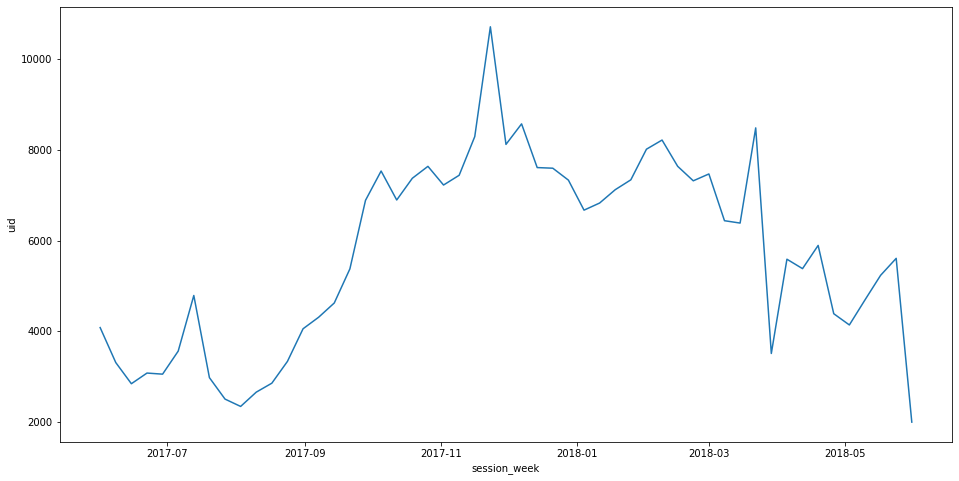

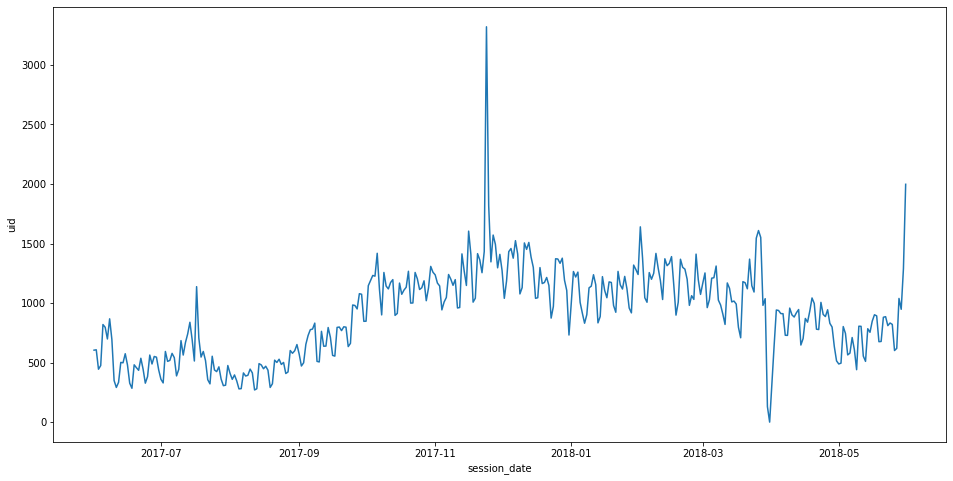

In [15]:
def draw_users_per_time(period, df):
    plt.figure(figsize=(16,8))
    (sns.lineplot(x=period, y='uid',
              data=df))
    
general_visits = [('session_month', data_mau), ('session_week', data_wau), ('session_date', data_dau)]

for pair in general_visits:
    draw_users_per_time(*pair)

In [117]:
mean_dau = data_dau['uid'].mean().round()
mean_wau = data_wau['uid'].mean().round()
mean_mau = data_mau['uid'].mean().round()

print('Среднее число пользователей в день: ', mean_dau)
print('Среднее число пользователей в неделю: ', mean_wau)
print('Среднее число пользователей в месяц: ', mean_mau)

Среднее число пользователей в день:  908.0
Среднее число пользователей в неделю:  5724.0
Среднее число пользователей в месяц:  23228.0


**В обобщеных данных можно заметить колебания посещаемости во времени. К новогоднему периоду посещаемость росла, превысив среднее число посещений в день к новому году в 3,5 раза. С октября по конец марта посещаемость сайта больше среднего: 25 - 30 тыс пользователей в месяц.**

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Отлично, графики очень наглядные и расчеты верные, в конце стоит вывести полученные метрики -- DAU, WAU, MAU и твои наблюдения по ним, так коллеги сразу увидят важные показатели. 
    
И можно добавить заголовки для графиков ) </div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Супер, теперь все наглядно, и здорово, что отметила сезонность
</div>

---


**Посмотрим как меняется со временем посещаемость по девайсам**   
Посчитаем количество уникальных пользователей по месяцам, неделям, дням, сгруппировав таблицу по типу устройства.  

In [16]:
data_mau_device = visits.groupby(['device', 'session_month']).agg({'uid': 'nunique'}).reset_index()
data_wau_device = visits.groupby(['device', 'session_week']).agg({'uid': 'nunique'}).reset_index()
data_dau_device = visits.groupby(['device', 'session_date']).agg({'uid': 'nunique'}).reset_index()


data_mau_device.head()


device session_month    uid
0  desktop    2017-06-01   9761
1  desktop    2017-07-01  10145
2  desktop    2017-08-01   8611
3  desktop    2017-09-01  13509
4  desktop    2017-10-01  21286

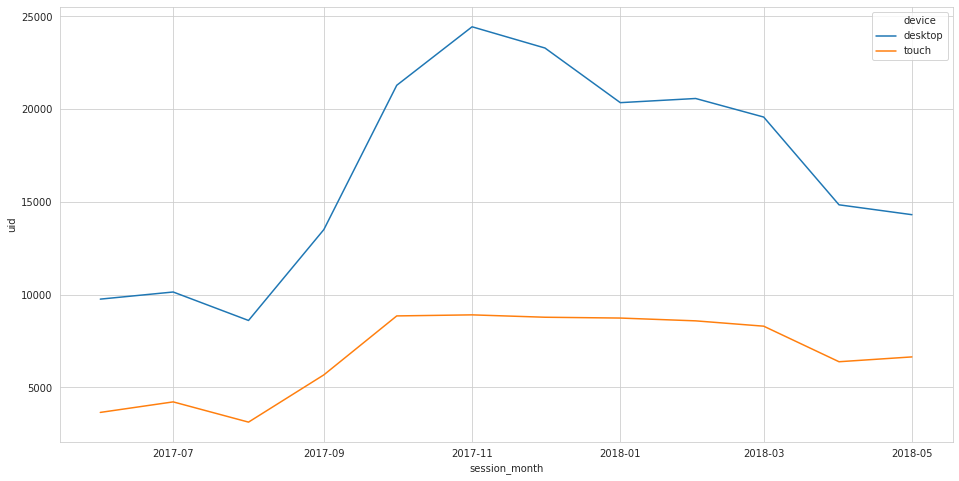

In [119]:
plt.figure(figsize=(16,8))
(sns.lineplot(x='session_month', y='uid', hue='device',
              data=data_mau_device));

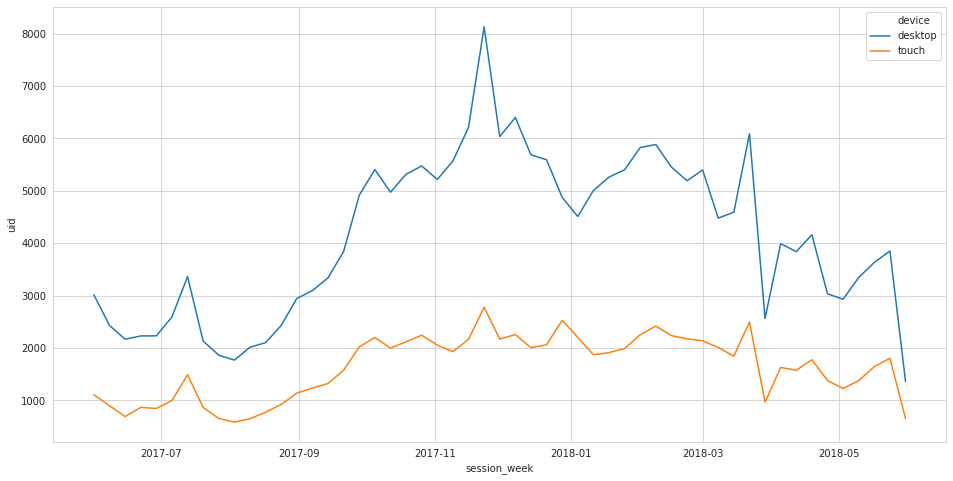

In [118]:
plt.figure(figsize=(16,8))
(sns.lineplot(x='session_week', y='uid', hue='device',
              data=data_wau_device));

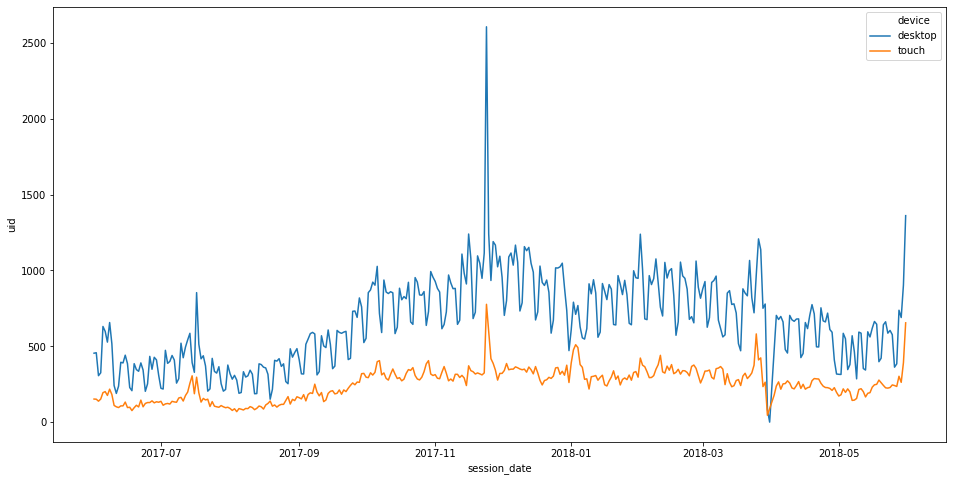

In [19]:
plt.figure(figsize=(16,8))
(sns.lineplot(x='session_date', y='uid', hue='device',
              data=data_dau_device));

In [121]:
desktops_d = data_dau_device.query('device == "desktop"')
desktops_w = data_wau_device.query('device == "desktop"')
desktops_m = data_mau_device.query('device == "desktop"')

print('Среднее кол-во пользоватлелей в день с десктопа', desktops_d['uid'].mean().round())
print('Среднее кол-во пользоватлелей в неделю с десктопа', desktops_w['uid'].mean().round())
print('Среднее кол-во пользоватлелей в месяц с десктопа', desktops_m['uid'].mean().round())


Среднее кол-во пользоватлелей в день с десктопа 659.0
Среднее кол-во пользоватлелей в неделю с десктопа 4136.0
Среднее кол-во пользоватлелей в месяц с десктопа 16725.0


In [122]:
touch_d = data_dau_device.query('device == "touch"')
touch_w = data_wau_device.query('device == "touch"')
touch_m = data_mau_device.query('device == "touch"')

print('Среднее кол-во пользоватлелей в день с мобильных', touch_d['uid'].mean().round())
print('Среднее кол-во пользоватлелей в неделю с мобильных', touch_w['uid'].mean().round())
print('Среднее кол-во пользоватлелей в месяц с мобильных', touch_m['uid'].mean().round())


Среднее кол-во пользоватлелей в день с мобильных 253.0
Среднее кол-во пользоватлелей в неделю с мобильных 1637.0
Среднее кол-во пользоватлелей в месяц с мобильных 6826.0


**По графикам видно, что посетителей с десктоп устройств больше примерно в 2.5 раза. На временных графиках так же прослеживается сезнные колебания, однако, посещаемость с мобильных устройств имеет меньше экстремумов**

 
Теперь посмотрим посещения сайта, разбив их по источникам. 

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Тут все верно и здорово что добавила легенду на график.

Чтобы перед графиком не выводились лишние надписи, используй знак ";" в конце кода (поправила на этом графике)
</div>

---


О, спасибо за совет!

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

;)</div>

---


In [20]:
data_mau_source = visits.groupby(['source_id', 'session_month']).agg({'uid': 'nunique'}).reset_index()

data_mau_source.head()

source_id session_month   uid
0          1    2017-06-01   972
1          1    2017-07-01  1047
2          1    2017-08-01   794
3          1    2017-09-01  1395
4          1    2017-10-01  2170

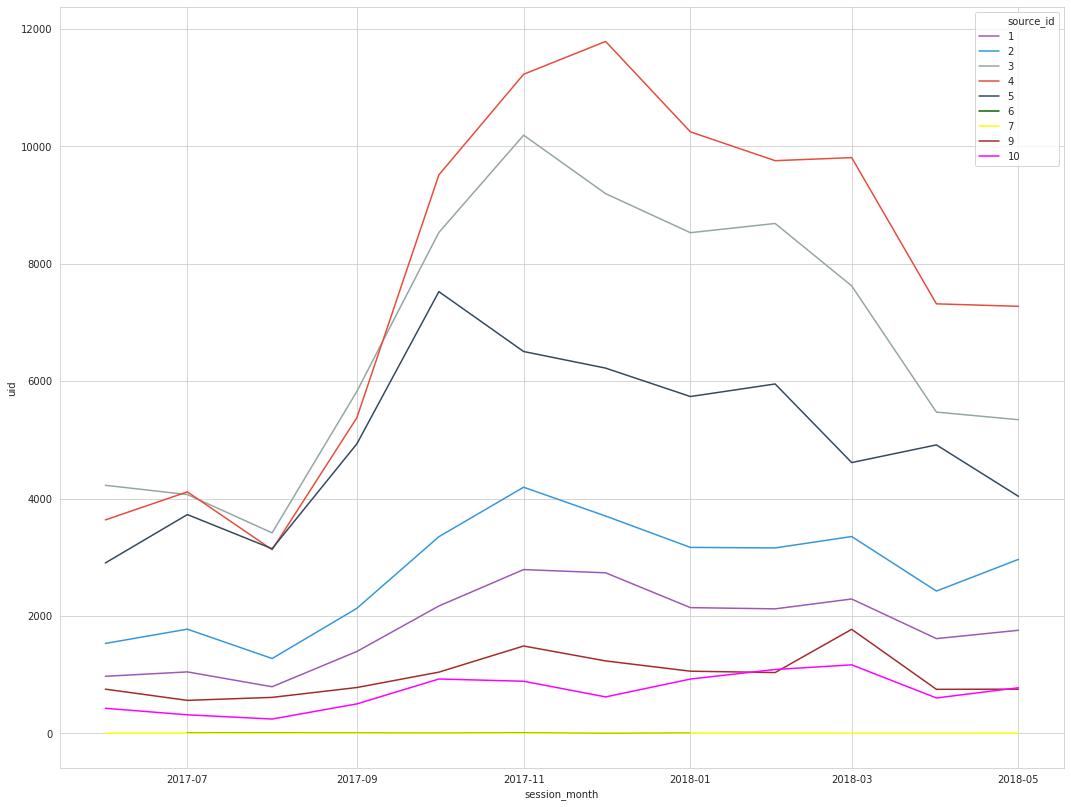

In [123]:
colors_0 = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#006400", "#F8FF06", "#A52A2A", "#FF00FF"]
palette_0 = sns.color_palette(colors_0)
plt.figure(figsize=(18,14))
sns.set_style("whitegrid")
(sns.lineplot(x='session_month', y='uid', hue='source_id', legend="full", palette=palette_0,
              data=data_mau_source));

**Источники 7 и 6 по графику почти не приносят посетителей:**  

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Отлично что заметила и перепроверила себя
</div>

---


In [22]:
data_mau_source.query('source_id == 7')

source_id session_month  uid
66          7    2017-06-01    2
67          7    2017-07-01    2
68          7    2017-08-01    1
69          7    2017-09-01    3
70          7    2017-10-01    5
71          7    2017-11-01    1
72          7    2017-12-01    9
73          7    2018-01-01    4
74          7    2018-02-01    3
75          7    2018-03-01    1
76          7    2018-04-01    1
77          7    2018-05-01    2

In [23]:
data_mau_source.query('source_id == 6')

source_id session_month  uid
60          6    2017-07-01    1
61          6    2017-08-01    1
62          6    2017-09-01    1
63          6    2017-11-01    1
64          6    2017-12-01    1
65          6    2018-01-01    1

In [24]:
data_wau_source = visits.groupby(['source_id', 'session_week']).agg({'uid': 'nunique'}).reset_index()
data_dau_source = visits.groupby(['source_id', 'session_date']).agg({'uid': 'nunique'}).reset_index()

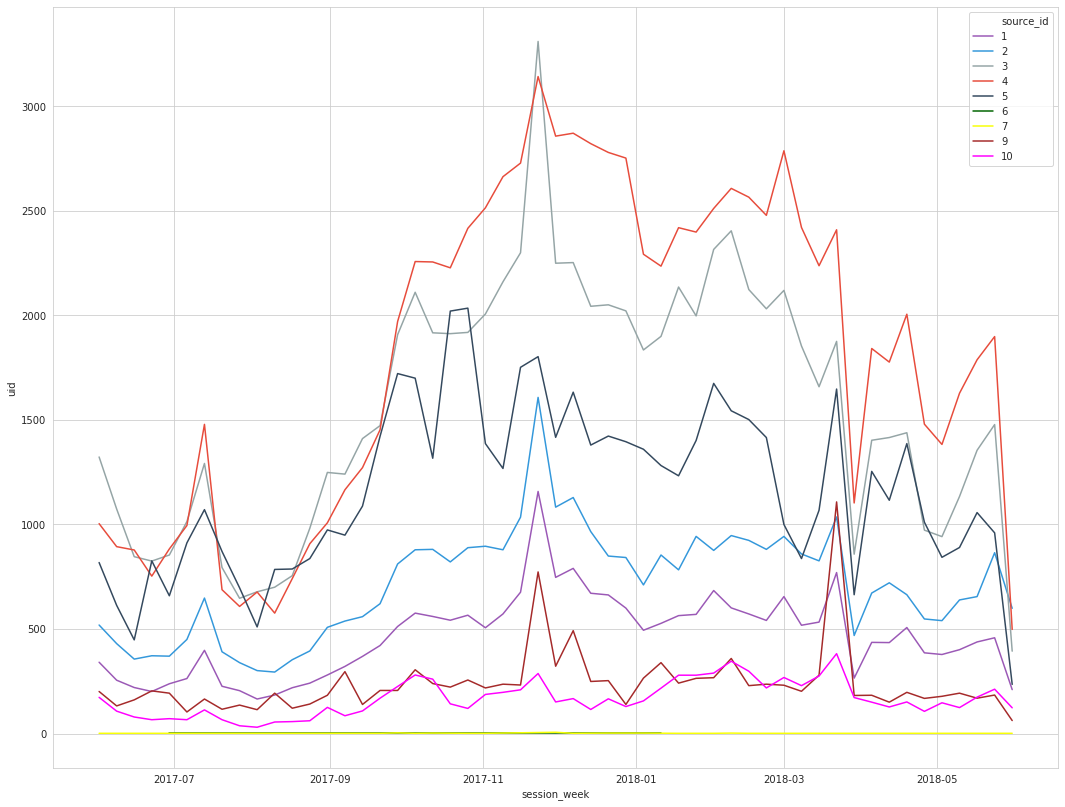

In [124]:
plt.figure(figsize=(18,14))
sns.set_style("whitegrid")
(sns.lineplot(x='session_week', y='uid', hue='source_id', legend="full", palette=palette_0,
              data=data_wau_source));

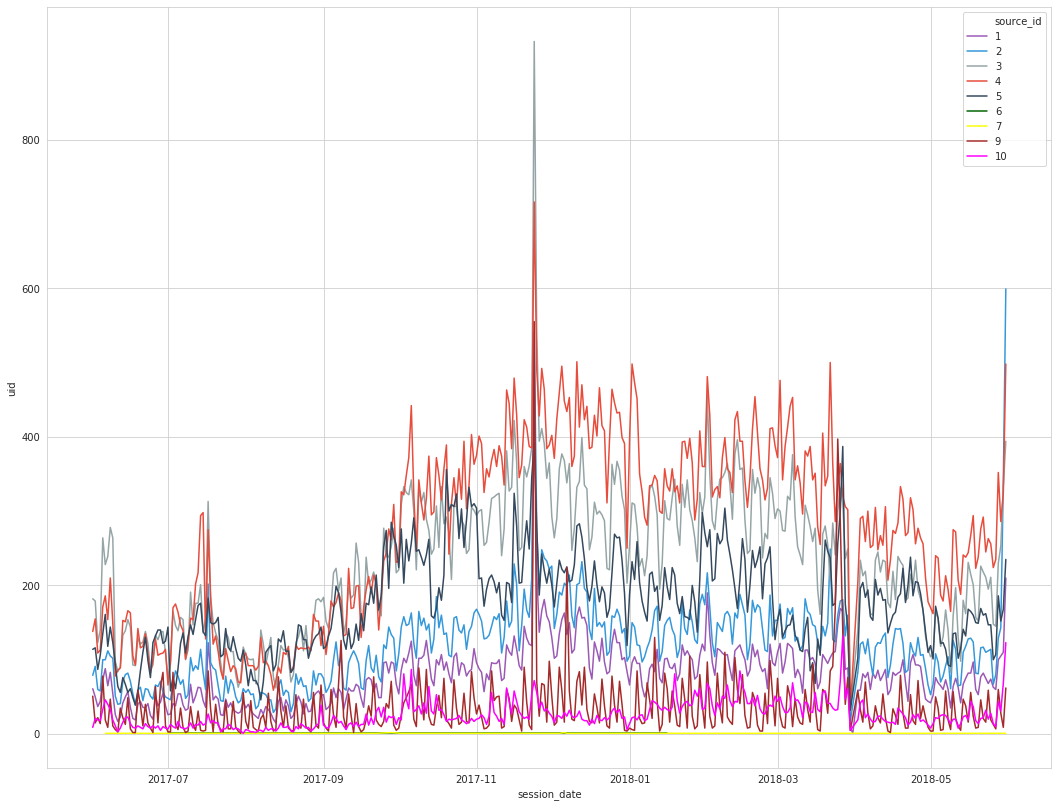

In [125]:
plt.figure(figsize=(18,14))
sns.set_style("whitegrid")
(sns.lineplot(x='session_date', y='uid', hue='source_id', legend="full", palette=palette_0,
              data=data_dau_source));

In [130]:
print('Посещаемость в месяц с 1 источника', data_mau_source.query('source_id == 1')['uid'].mean().round())
print('Посещаемость в месяц с 2 источника', data_mau_source.query('source_id == 2')['uid'].mean().round())
print('Посещаемость в месяц с 3 источника', data_mau_source.query('source_id == 3')['uid'].mean().round())
print('Посещаемость в месяц с 4 источника', data_mau_source.query('source_id == 4')['uid'].mean().round())
print('Посещаемость в месяц с 5 источника', data_mau_source.query('source_id == 5')['uid'].mean().round())
print('Посещаемость в месяц с 6 источника', data_mau_source.query('source_id == 6')['uid'].mean().round())
print('Посещаемость в месяц с 7 источника', data_mau_source.query('source_id == 7')['uid'].mean().round())
print('Посещаемость в месяц с 9 источника', data_mau_source.query('source_id == 9')['uid'].mean().round())
print('Посещаемость в месяц с 10 источника', data_mau_source.query('source_id == 10')['uid'].mean().round())





Посещаемость в месяц с 1 источника 1819.0
Посещаемость в месяц с 2 источника 2752.0
Посещаемость в месяц с 3 источника 6759.0
Посещаемость в месяц с 4 источника 7766.0
Посещаемость в месяц с 5 источника 5018.0
Посещаемость в месяц с 6 источника 1.0
Посещаемость в месяц с 7 источника 3.0
Посещаемость в месяц с 9 источника 987.0
Посещаемость в месяц с 10 источника 707.0


**С источников 4, 3 и 5 приходит больше всего пользователей в месяц. Источники 6 и 7 не приносят пользователей, 6 уже не используется с января 2018, а 7 все еще в силе. Возможно стоит проверить, корректно ли сделана выгрузка для этого источника, либо он и вправду абсолютно неэффективный. Будет интересно посмотреть, сколько на него приходится затрат. Возможно, что это органический траффик -- кто-то случайно откуда-то переходит на сайт, примерно 3 человека в месяц)**   

**Вцелом по графикам видно, что посещаемость носит нелинейный характер, не уменьшается или увеличивается во времени, подвержена сезонным колебаниям. Наиболее посещаемый период новогодний, возможно, тогда люди чаще всего ищут как им провести свободное время.  
Чаще люди заходят на сайт с десктопа, возможно, это можно объяснить тем, что они все-таки немного плаинируют свой отдых, заходят на сайт немного заранее перед мероприятием со стационарного устройства, возможно, вечером на работе.**

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

У тебя получаются очень крупные понятные графики, по ним я вижу что и с расчетами все в порядке. Но к сожалению, у раздела почти нет выводов -- какие метрики мы получили, как они меняются по времени, почему так может происходит -- все это стоит обобщить в выводах, чтобы сразу было понятно куда смотреть.


</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Отличные наблюдения, коллеги будут благодарны
</div>

---


### 2.1.2. Продукт. Сколько сессий в день?

In [145]:
sessions_per_day = visits.groupby(['session_date']).agg({'uid': 'count'}).reset_index()
sessions_per_day.describe()

uid
count   364.000000
mean    987.362637
std     418.994796
min       1.000000
25%     635.500000
50%    1003.000000
75%    1280.000000
max    4042.000000

In [142]:
visits.groupby(['session_date']).agg({'uid': 'nunique'}).describe()

uid
count   364.000000
mean    907.991758
std     370.513838
min       1.000000
25%     594.000000
50%     921.000000
75%    1173.000000
max    3319.000000

С сессий в день немного больше, чем посетителей -- далеко не все пользователи заходят на сайт за день повторно

**Сколько сессий в день вообще:**

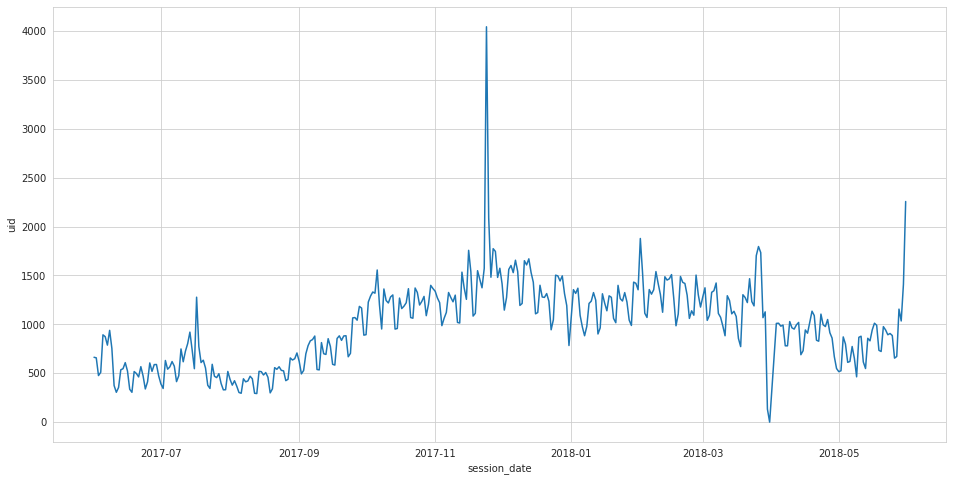

In [146]:
plt.figure(figsize=(16,8))
(sns.lineplot(x='session_date', y='uid',
              data=sessions_per_day));

Сколько сессий в день по устройствам:

In [30]:
day_sessions_device = visits.groupby(['device', 'session_date']).agg({'uid': 'count'}).reset_index()

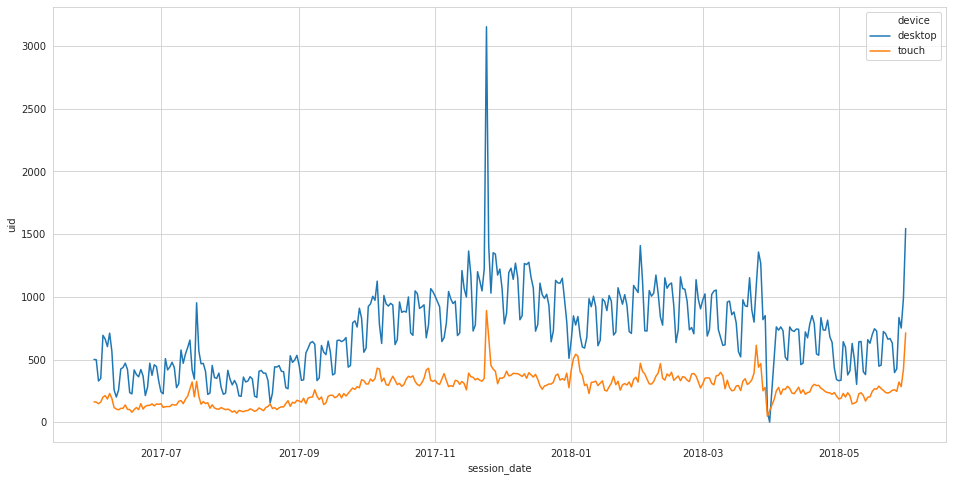

In [147]:
plt.figure(figsize=(16,8))
(sns.lineplot(x='session_date', y='uid', hue='device',
              data=day_sessions_device));

По источникам:

In [32]:
day_sessions_source = (visits
                       .groupby(['source_id', 'session_date'])
                       .agg({'uid': 'count'}).reset_index())

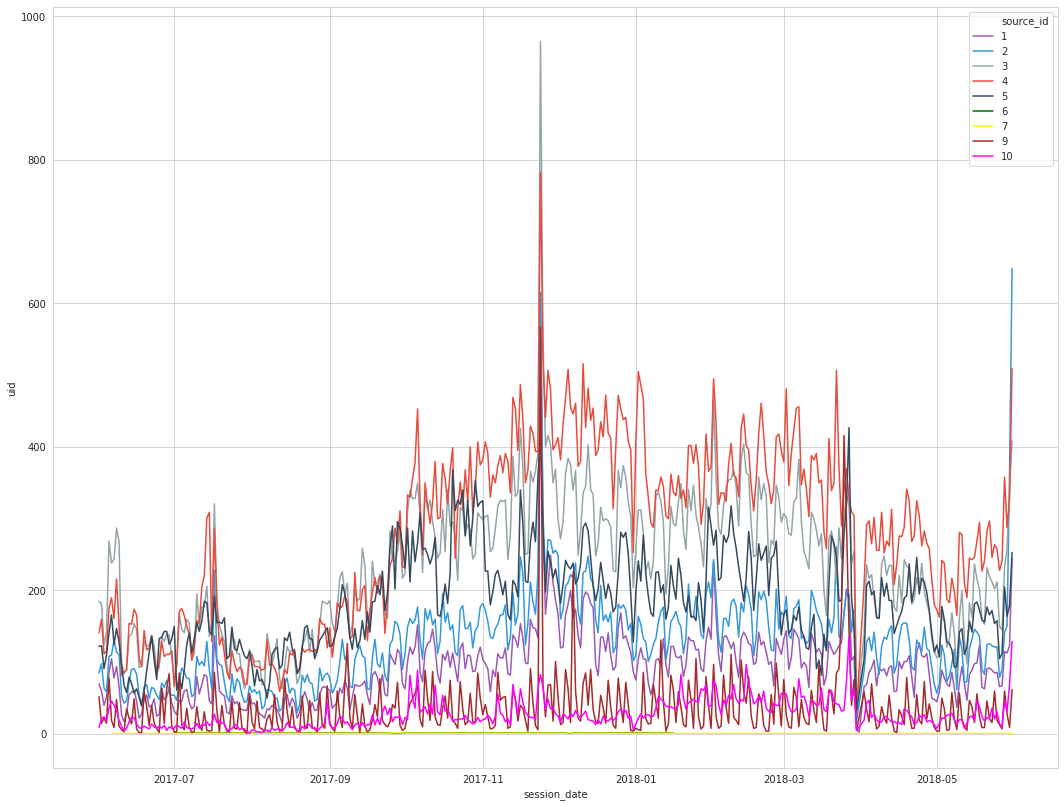

In [148]:
plt.figure(figsize=(18,14))
sns.set_style("whitegrid")
(sns.lineplot(x='session_date', y='uid', hue='source_id', legend="full", palette=palette_0,
              data=day_sessions_source));

**Графики сессий в общем не чем не отличаются от графиков пользователей. Главное -- пользователи редко приходят больше одного раза в день. В среднем 987 сессий на 908 пользователей. Возможно они приходят уже с какой-то конкретной целью -- купить билет или посмотреть даты интересующего мероприятия. Наибольшее количество сессий, как и пользователей, с источников 4,3,5**

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Тут такое замечание что и выше, выводы очень нужны


</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Тут тоже все верно
</div>

---


### 2.1.3. Продукт. Сколько длится одна сессия?

In [34]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_month session_week session_date  
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20  
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19  
2   7459035603376831527    2017-07-01   2017-06-29   2017-07-01  
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20  
4   9969694820036681168    2017-12-01   2017-12-21   2017-12-27

In [35]:
visits_correct = visits[visits['end_ts'] > visits['start_ts']]
visits_correct['session_duration'] = visits_correct['end_ts'] - visits_correct['start_ts']
visits_correct['session_duration'] = visits_correct['session_duration'].dt.total_seconds()
visits_correct.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19   
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20   
5  16007536194108375387    2017-09-01   2017-08-31   2017-09-03   
6   6661610529277171451    2018-01-01   2018-01-25   2018-01-30   

   session_duration  
0            1080.0  
1            1680.0  
3            1440.0  
5              60.0  
6            3360.0

(1, 3000)

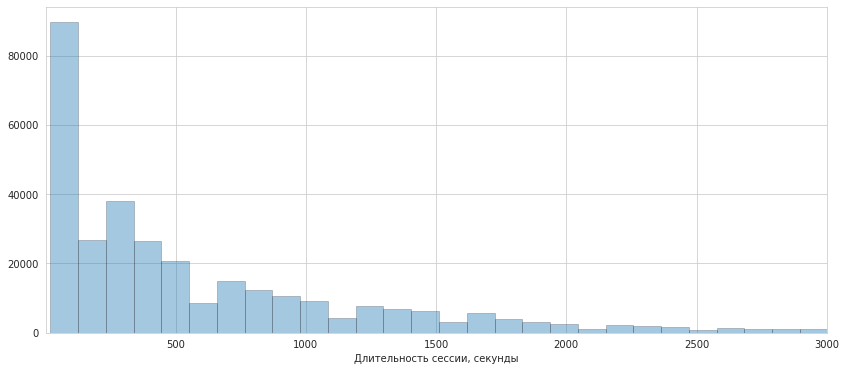

In [149]:
plt.figure(figsize=(14,6))
sns.distplot(visits_correct['session_duration'], kde=False, bins=400,
             hist_kws=dict(edgecolor='k', linewidth=0.5),
             axlabel='Длительность сессии, секунды')
plt.xlim(1, 3000)

[(100, 4000)]

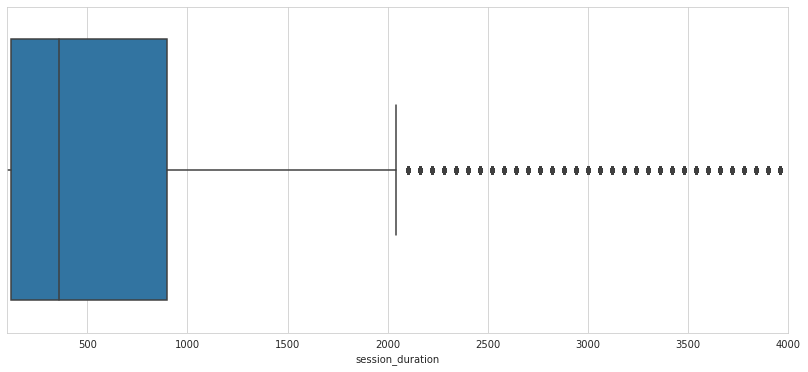

In [151]:
plt.figure(figsize=(14,6))
sns.boxplot(x='session_duration', data=visits_correct).set(xlim=(100, 4000))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


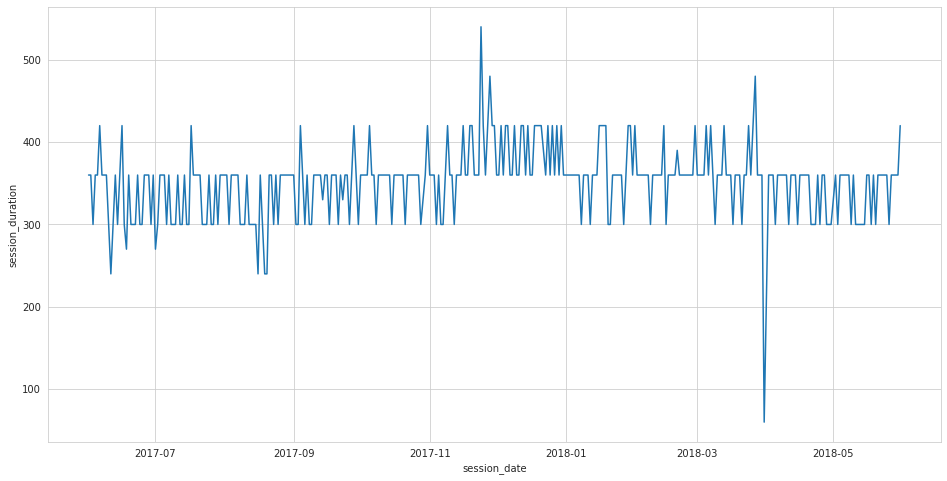

In [164]:
session_durations = visits_correct
session_durations['session_duration'] = session_durations['session_duration'].astype('int')
session_durations = session_durations.groupby('session_date').agg({'session_duration': 'median'}).reset_index()
session_durations
plt.figure(figsize=(16,8))
(sns.lineplot(x='session_date', y='session_duration',
              data=session_durations));



In [38]:
visits_correct['session_duration'].describe()

count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: session_duration, dtype: float64

**Половина сессий длится не дольше 360 секунд (6 минут) -- возможно люди приходят узнать какую-то конкретную информацию (все-таки мы имеем дело с афишей) и уходят. Большая часть вписывается 900 секунд (15минут). В период с ноября по конец декабря пользователи больше проводят времени на сайте -- опять же, наверное, выбирают куда пойти в новогодние выходные**

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Отлично, ты посмотрела на данные с разных сторон, графики очень наглядные. Для такого распределения лучше брать другой параметр, не среднее, он не так точно описывает ситуацию с посещениями

</div>

---


Как раз я хотела взять медианные значения 360 и 900 секунд

По источникам:

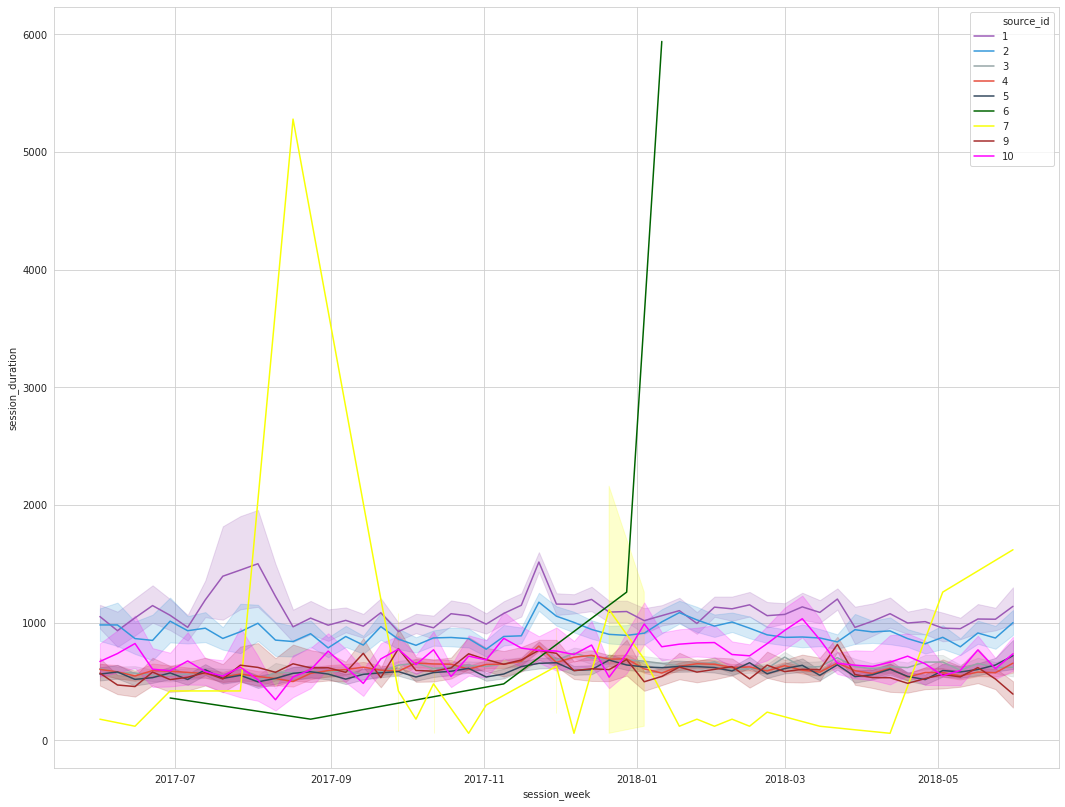

In [39]:
plt.figure(figsize=(18,14))
sns.set_style("whitegrid")
(sns.lineplot(x='session_week', y='session_duration', hue='source_id', legend="full",
              palette=palette_0,
              data=visits_correct))

Те самые источники 6 и 7 с 1-3 людьми в месяц -- в них аномально длинные сессии. Посмотрим на графики без них

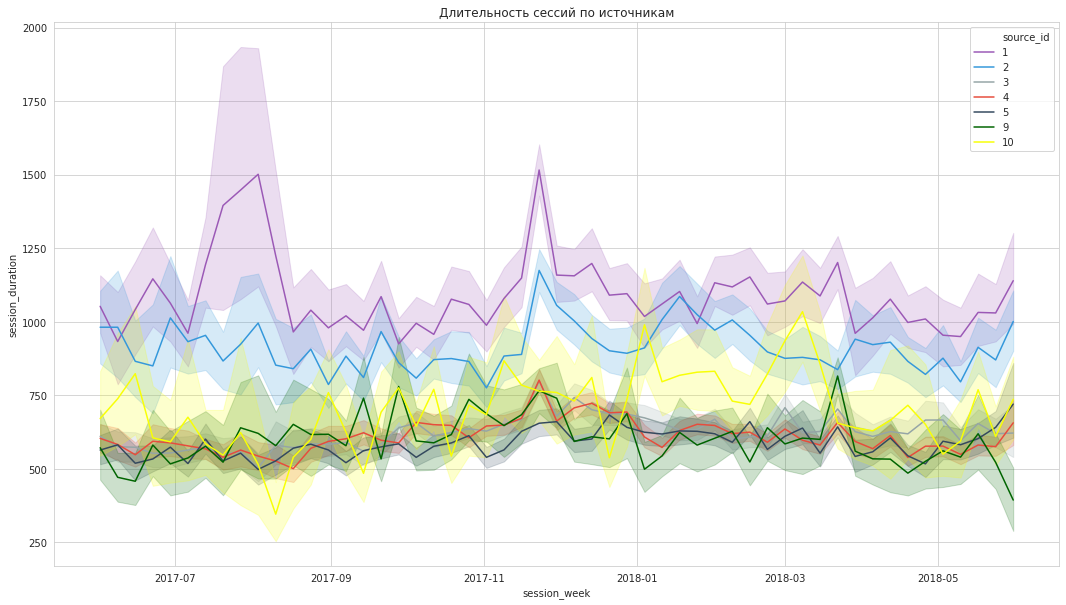

In [202]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
plt.title('Длительность сессий по источникам')
(sns.lineplot(x='session_week', y='session_duration', hue='source_id', legend="full",
              palette=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#006400", "#F8FF06"],
              data=visits_correct.query('(source_id != 7) and (source_id != 6)')));

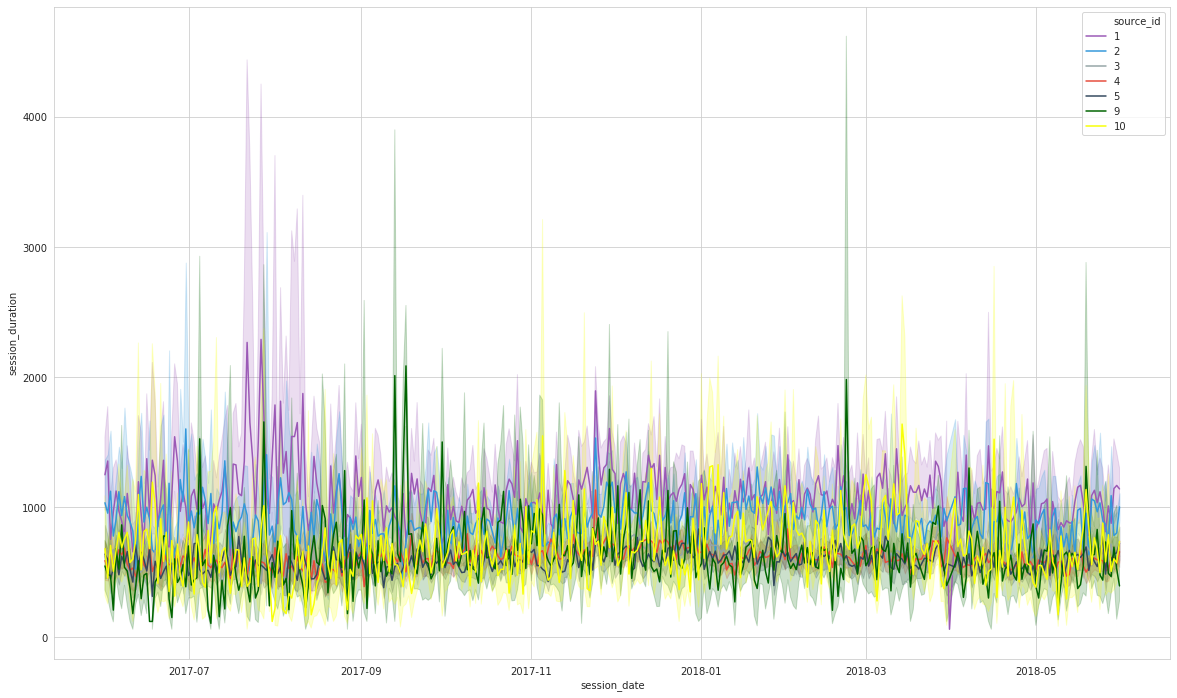

In [180]:
plt.figure(figsize=(20,12))
sns.set_style("whitegrid")
(sns.lineplot(x='session_date', y='session_duration', hue='source_id', legend="full",
              palette=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#006400", "#F8FF06"],
              data=visits_correct.query('(source_id != 7) and (source_id != 6)')));

**Люди, пришедшие с источника 1 часто проводят на сайте больше времени, чем большая часть пользователей, больше 1000 секунд. Так же это можно заметить у источника 2**

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Важное наблюдение. Можно убирать с графика такие выбросы, тогда распределение по остальным источникам не будет таким кучным


</div>

---


По устройствам:

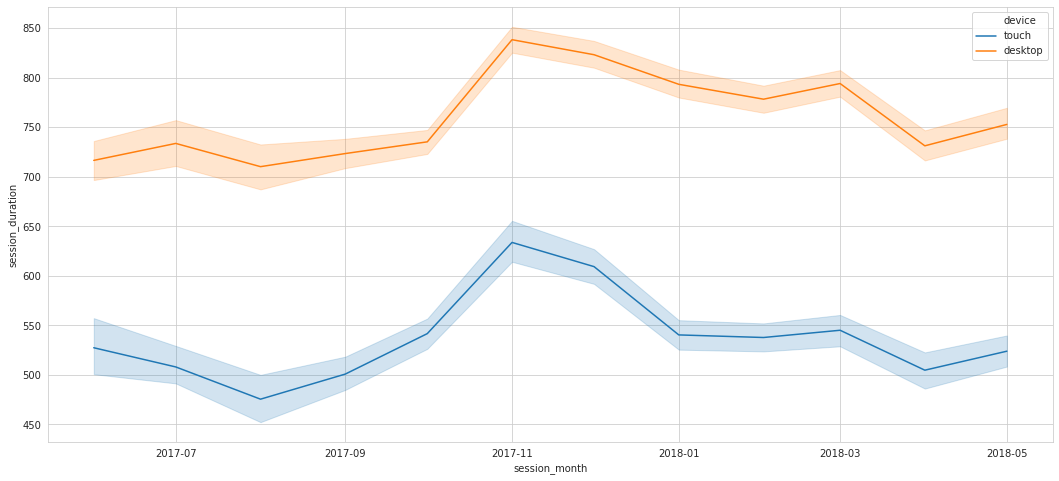

In [41]:
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
(sns.lineplot(x='session_month', y='session_duration', hue='device', legend="full",
              data=visits_correct))

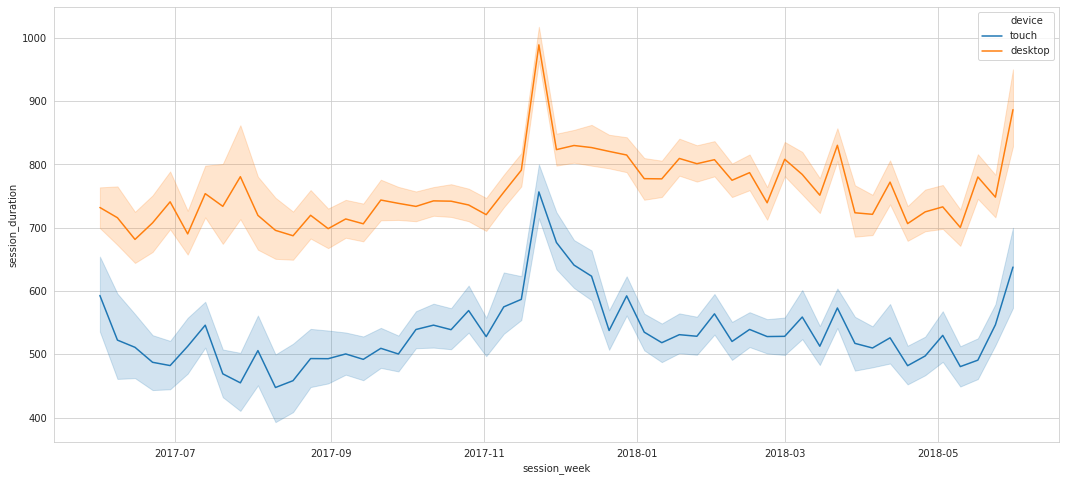

In [42]:
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
(sns.lineplot(x='session_week', y='session_duration', hue='device', legend="full",
              data=visits_correct))

**Сессии с десктоп устройств длятся примерно в полтора раза дольше. Для десктоп устройств длительность оставляет 700 - 800 секунд, для мобильных -- 500-600.  
По источникам, по длительности сессии выделяется 1 источник -- от 1000 до 1250 секунд, от 850 до 1000 секунд**

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Мне очень понравилось что ты использовала тут таккой тип графика, визуально сразу все понятно. 
    
Тут такой же комментарий что и выше -- нужно подвести итого и вывести численные метрики, они важны для наблюдений и ради них делается исследование


</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Отлично, верные выводы

</div>

---


### 2.1.4. Продукт. Как часто люди возвращаются?

In [43]:
visits_correct.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19   
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20   
5  16007536194108375387    2017-09-01   2017-08-31   2017-09-03   
6   6661610529277171451    2018-01-01   2018-01-25   2018-01-30   

   session_duration  
0            1080.0  
1            1680.0  
3            1440.0  
5              60.0  
6            3360.0

Узнаем для пользователей день совершения первого посещения

In [44]:
first_visit = visits_correct.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit'
first_visit.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_visit, dtype: datetime64[ns]

In [45]:
retention = visits_correct.join(first_visit, on='uid')
retention['first_visit_month'] = retention['first_visit'].astype('datetime64[M]')
retention.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19   
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20   
5  16007536194108375387    2017-09-01   2017-08-31   2017-09-03   
6   6661610529277171451    2018-01-01   2018-01-25   2018-01-30   

   session_duration         first_visit first_visit_month  
0            1080.0 2017-12-20 17:20:00        2017-12-01  
1            1680.0 2018-02-19 16:53:00        2018-02-01  
3            1440.0 2018-03-09 20:05:00        2018-03-01  
5              60.0 2017-09-03 21:35:00        2017-09-01  
6            3360.0 2017-06-29 09:00:00        2017-06-01

In [46]:
retention['visits_lifetime'] = retention['session_month'] - retention['first_visit_month']
retention['visits_lifetime'] = retention['visits_lifetime'] / np.timedelta64(1,'M')
retention['visits_lifetime'] = retention['visits_lifetime'].round().astype('int')

retention.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19   
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20   
5  16007536194108375387    2017-09-01   2017-08-31   2017-09-03   
6   6661610529277171451    2018-01-01   2018-01-25   2018-01-30   

   session_duration         first_visit first_visit_month  visits_lifetime  
0            1080.0 2017-12-20 17:20:00        2017-12-01                0  
1            1680.0 2018-02-19 16:53:00        2018-02-01                0  
3            1440.0 2018-03-09 20:05:00        2018-03-01                2  
5              60.0 2017-09-03 21:35:00        2017-09-01                0  
6            3360.0 2017-06-29 09:00:00        2017-06-01                7

In [47]:
retention.pivot_table(index='first_visit_month',
                        columns='visits_lifetime',
                        values='uid',
                        aggfunc='nunique')

visits_lifetime         0       1       2      3      4      5      6      7   \
first_visit_month                                                               
2017-06-01         11885.0   900.0   606.0  710.0  777.0  802.0  686.0  667.0   
2017-07-01         11825.0   645.0   596.0  658.0  670.0  550.0  521.0  521.0   
2017-08-01          9214.0   686.0   557.0  557.0  442.0  382.0  334.0  347.0   
2017-09-01         15125.0  1264.0  1025.0  746.0  576.0  559.0  535.0  346.0   
2017-10-01         23538.0  1839.0  1196.0  890.0  792.0  734.0  489.0  466.0   
2017-11-01         24852.0  1943.0  1062.0  940.0  810.0  540.0  512.0    NaN   
2017-12-01         23030.0  1259.0   841.0  695.0  448.0  408.0    NaN    NaN   
2018-01-01         20573.0  1189.0   778.0  501.0  396.0    NaN    NaN    NaN   
2018-02-01         20173.0  1141.0   490.0  387.0    NaN    NaN    NaN    NaN   
2018-03-01         18793.0   766.0   480.0    NaN    NaN    NaN    NaN    NaN   
2018-04-01         14215.0   675.0     NaN    NaN    NaN    NaN    NaN    NaN   
2018-05-01         13828.0     NaN     NaN    NaN    NaN    NaN    NaN    NaN   

visits_lifetime       8      9      10     11  
first_visit_month                              
2017-06-01         606.0  591.0  453.0  522.0  
2017-07-01         448.0  323.0  320.0    NaN  
2017-08-01         250.0  228.0    NaN    NaN  
2017-09-01         344.0    NaN    NaN    NaN  
2017-10-01           NaN    NaN    NaN    NaN  
2017-11-01           NaN    NaN    NaN    NaN  
2017-12-01           NaN    NaN    NaN    NaN  
2018-01-01           NaN    NaN    NaN    NaN  
2018-02-01           NaN    NaN    NaN    NaN  
2018-03-01           NaN    NaN    NaN    NaN  
2018-04-01           NaN    NaN    NaN    NaN  
2018-05-01           NaN    NaN    NaN    NaN

**Бросается в глаза разница между количеством новых посетителей 0 месяце жизни и как в последующем их становится уже на порядок меньше. Много пользователей удается привлечь для первого посещения, но большая часть из них не возвращается**


Найдем retention для когорт по первлму месяцу визита, по устройству, по источнику

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Все верно, и расчеты, и твои выводы

</div>

---


 
#### Cформируем когорты на основании того с какого истоника / устройства пришли пользователи в первый раз

In [48]:
retention.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19   
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20   
5  16007536194108375387    2017-09-01   2017-08-31   2017-09-03   
6   6661610529277171451    2018-01-01   2018-01-25   2018-01-30   

   session_duration         first_visit first_visit_month  visits_lifetime  
0            1080.0 2017-12-20 17:20:00        2017-12-01                0  
1            1680.0 2018-02-19 16:53:00        2018-02-01                0  
3            1440.0 2018-03-09 20:05:00        2018-03-01                2  
5              60.0 2017-09-03 21:35:00        2017-09-01                0  
6            3360.0 2017-06-29 09:00:00        2017-06-01                7

In [49]:
retention_sorted = retention.sort_values(by=['uid', 'start_ts'])

In [50]:
first_device = retention_sorted.groupby('uid')['device'].first()
first_device.name = 'first_device'


In [51]:
first_source = retention_sorted.groupby('uid')['source_id'].first()
first_source.name = 'first_source'


In [52]:
first_source = retention_sorted.groupby('uid')['source_id'].first()
first_source.name = 'first_source'

In [53]:
retention = retention.join(first_device, on='uid')
retention = retention.join(first_source, on='uid')
retention.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19   
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20   
5  16007536194108375387    2017-09-01   2017-08-31   2017-09-03   
6   6661610529277171451    2018-01-01   2018-01-25   2018-01-30   

   session_duration         first_visit first_visit_month  visits_lifetime  \
0            1080.0 2017-12-20 17:20:00        2017-12-01                0   
1            1680.0 2018-02-19 16:53:00        2018-02-01                0   
3            1440.0 2018-03-09 20:05:00        2018-03-01                2   
5              60.0 2017-09-03 21:35:00        2017-09-01                0   
6            3360.0 2017-06-29 09:00:00        2017-06-01                7   

  first_device  first_source  
0        touch             4  
1      desktop             2  
3      desktop             4  
5      desktop             5  
6      desktop             2

Теперь уже можно находить retention

In [54]:
def get_retention(group_type, title):
    # найдем число пользователей по месяцам жизни
    cohorts = retention.groupby([group_type,'visits_lifetime']).agg({'uid':'nunique'}).reset_index()
    
    
    # найдем размер когорт (посетители, пришедшие в первый раз в месяц/с устройства/с источника)
    initial_users_count = (retention.query('visits_lifetime == 0')
                           .groupby([group_type]).agg({'uid':'nunique'}).reset_index())
    
    initial_users_count = initial_users_count.rename(columns={'uid':'initial_cohort_users'})
    
    cohorts = cohorts.merge(initial_users_count, on=group_type)
    cohorts['retention'] = cohorts['uid'] / cohorts['initial_cohort_users']
    
    retention_pivot = (cohorts
                       .pivot_table(index=group_type, 
                                    columns='visits_lifetime',
                                    values='retention',
                                    aggfunc='sum'))
    
    plt.figure(figsize=(13, 9))
    plt.title(title)
    sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

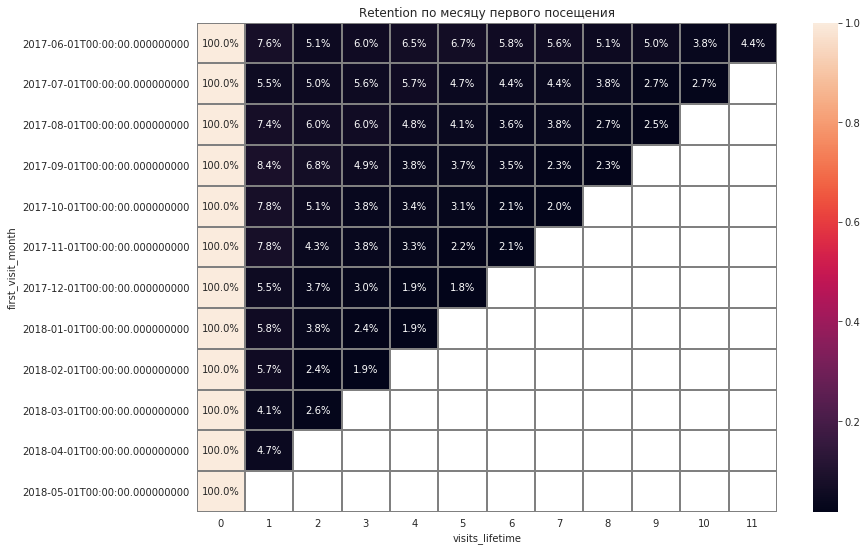

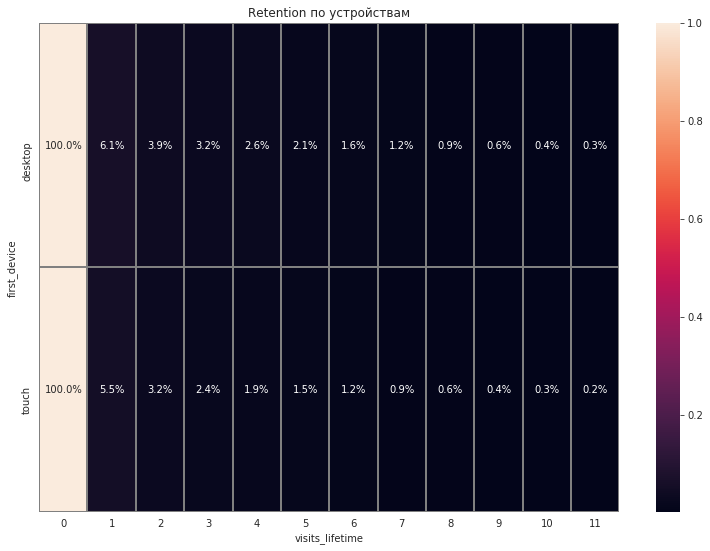

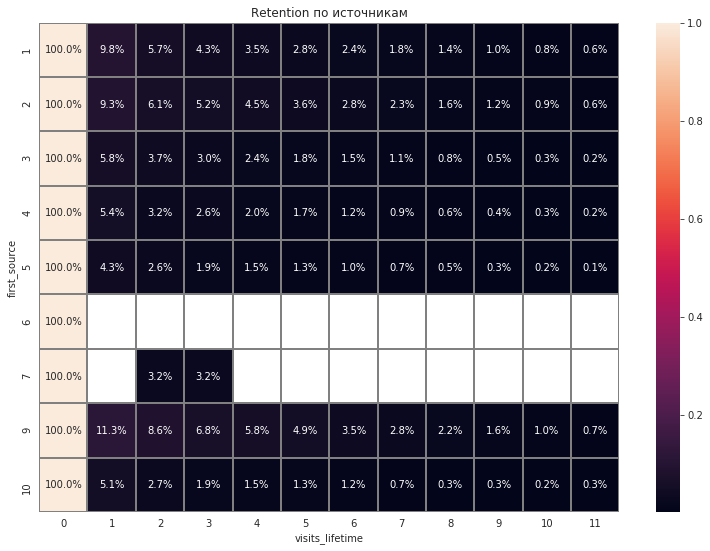

In [55]:
retention_cases = [('first_visit_month', 'Retention по месяцу первого посещения'),
                   ('first_device', 'Retention по устройствам'), ('first_source', 'Retention по источникам')]
for r_case in retention_cases:
    get_retention(*r_case)

**Тенденция прослеживается и на разбивке по устройствам и источникам -- возвращается 6-7% пользователей. Между мобильными идесктоп устройствами нет особой разницы. Для источников в 9 и 2 больше пользователей возвращается в первые пару месяцев, но дальше картина выравнивается**

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Супер! Тут все идеально: наглядный график, верный расчет, конкретные выводы :)

</div>

---


## 2.2. Продажи
Когда люди начинают покупать?  
Сколько раз покупают за период?  
Какой средний чек?  
Сколько денег приносят? (LTV)  

### 2.2.1 Продажи. Когда люди начинают покупать?

Найдем длительность периода времени от первого посещения до первой покупки.

In [56]:
orders.head()

buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [57]:
first_visit_order = orders.join(first_visit, on='uid', how='left')
first_visit_order = first_visit_order[first_visit_order['first_visit'] < first_visit_order['buy_ts']]
first_visit_order.head()

buy_ts  revenue                   uid         first_visit
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:09:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:14:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:25:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:14:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:31:00

In [58]:
first_visit_order['delta'] = first_visit_order['buy_ts'] - first_visit_order['first_visit']
first_visit_order['delta'] = first_visit_order['delta'].dt.total_seconds() / 60


In [59]:
first_visit_order['delta'].describe()

count     47390.000000
mean      54561.785651
std      102470.391730
min           1.000000
25%           8.000000
50%         347.500000
75%       59444.750000
max      524669.000000
Name: delta, dtype: float64

**У половины пользователей первая покупка происходит в течении дня, в который они впервые посетили сайт. В первый визит они находят то, что нужно и сразу же (видимо) совершают покупку. Можно предположить, что они зашли на сайт с намерением купить.**


In [60]:
first_visit_order['delta_hours'] = first_visit_order['delta'] / 60
first_visit_order['delta_hours'].describe()

count    47390.000000
mean       909.363094
std       1707.839862
min          0.016667
25%          0.133333
50%          5.791667
75%        990.745833
max       8744.483333
Name: delta_hours, dtype: float64

В течении 5 часов после первого визита половина пользователей делает покупку

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Именно так. А если ты посмотришь распределение по визитам и применишь нужный параметр, будет видно что срок гораздо меньше, чем день
</div>

---


In [61]:
first_visit_order['delta_days'] = first_visit_order['delta_hours'] / 24
first_visit_order['delta_days'].describe()

count    47390.000000
mean        37.890129
std         71.159994
min          0.000694
25%          0.005556
50%          0.241319
75%         41.281076
max        364.353472
Name: delta_days, dtype: float64

Еще четверть посетителей делает покупки в течении 40 дней с момента первого визита

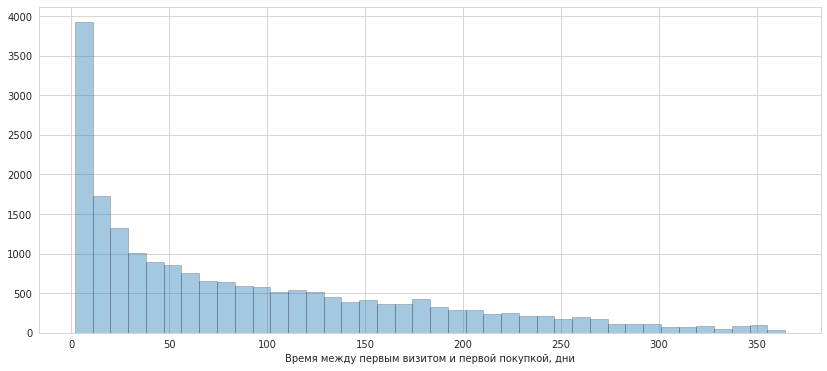

In [62]:
plt.figure(figsize=(14,6))
sns.distplot(first_visit_order.query('delta_days > 2')['delta_days'], kde=False, bins=40,
             hist_kws=dict(edgecolor='k', linewidth=0.5),
             axlabel='Время между первым визитом и первой покупкой, дни')

Ну а кто-то и вовсе покупает через год)

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Или так) Но хорошо,  что все-таки покупают)
</div>

---


### 2.2.2. Продажи. Сколько раз покупают за период?
 
Сложим количество покупок за месяц и поделим на количество уникальных покупателей за месяц

In [63]:
orders.head()

buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [64]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]') 
orders['buy_week']  = orders['buy_ts'].astype('datetime64[W]') 
orders['buy_date'] = orders['buy_ts'].astype('datetime64[D]')
orders.head()

buy_ts  revenue                   uid  buy_month   buy_week  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 2017-06-01   

    buy_date  
0 2017-06-01  
1 2017-06-01  
2 2017-06-01  
3 2017-06-01  
4 2017-06-01

In [65]:
general_purchases_m = (orders
                     .groupby('buy_month').agg({'uid': 'nunique', 'buy_ts': 'count', 'revenue': 'sum'})
                     .reset_index())
general_purchases_m['purchases_per_buyer'] = general_purchases_m['buy_ts'] / general_purchases_m['uid']
general_purchases_m['check_everage'] = general_purchases_m['revenue'] / general_purchases_m['uid']

general_purchases_m.tail()

buy_month   uid  buy_ts   revenue  purchases_per_buyer  check_everage
8  2018-02-01  4258    5281  25560.54             1.240254       6.002945
9  2018-03-01  4181    5326  28834.59             1.273858       6.896577
10 2018-04-01  2744    3273  16858.06             1.192784       6.143608
11 2018-05-01  3544    4346  20735.98             1.226298       5.851010
12 2018-06-01     1       1      3.42             1.000000       3.420000

Будем иметь в виду, что в 2018-06-01 1 покупка, видимо, это только начало месяца

In [66]:
general_purchases_m['purchases_per_buyer'].describe()

count    13.000000
mean      1.205823
std       0.068470
min       1.000000
25%       1.192784
50%       1.226298
75%       1.240254
max       1.273858
Name: purchases_per_buyer, dtype: float64

В среднем на каждого покупателя приходится 1 покупка в месяц.

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

Вот этот вывод стоит конкретизировать. Речь о среднем пользователей? Или среднем покупателе? Или вообще у сервиса одна продажа в месяц?
</div>

---


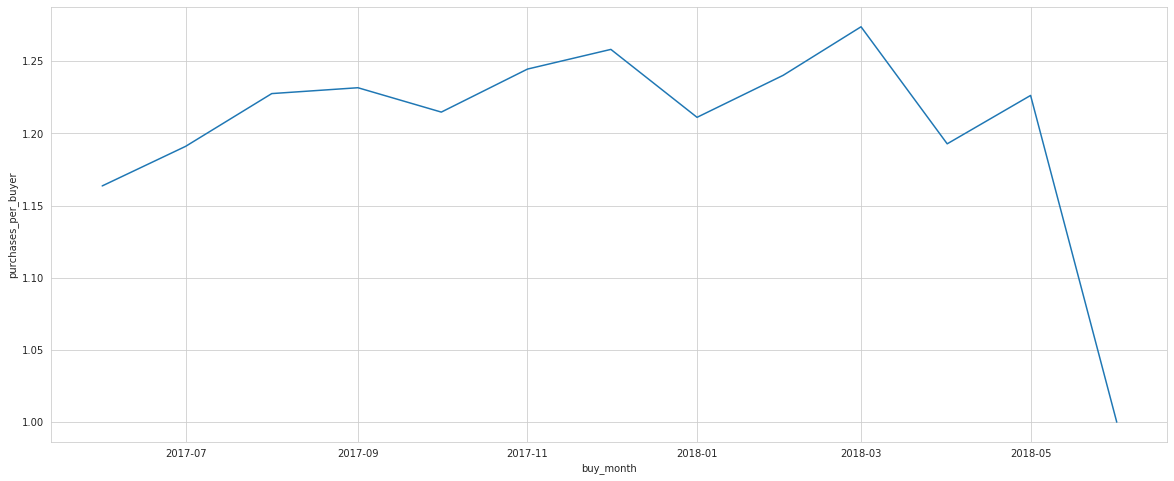

In [67]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
(sns.lineplot(x='buy_month', y='purchases_per_buyer', legend="full",
              data=general_purchases_m))

Пики приходятся на март и декабрь, как ни странно, в марте покупок больше. Как мы помним посещаемость у сайта пиковая в декабре

In [68]:
general_purchases_w = (orders
                     .groupby('buy_week').agg({'uid': 'nunique', 'buy_ts': 'count', 'revenue': 'sum'})
                     .reset_index())
general_purchases_w['purchases_per_buyer'] = general_purchases_w['buy_ts'] / general_purchases_w['uid']
general_purchases_w['check_everage'] = general_purchases_w['revenue'] / general_purchases_w['uid']

general_purchases_w.tail()

buy_week  uid  buy_ts  revenue  purchases_per_buyer  check_everage
48 2018-05-03  586     651  2770.33             1.110922       4.727526
49 2018-05-10  620     734  4312.47             1.183871       6.955597
50 2018-05-17  968    1156  4073.73             1.194215       4.208399
51 2018-05-24  926    1086  4423.49             1.172786       4.776987
52 2018-05-31  571     611  4617.34             1.070053       8.086410

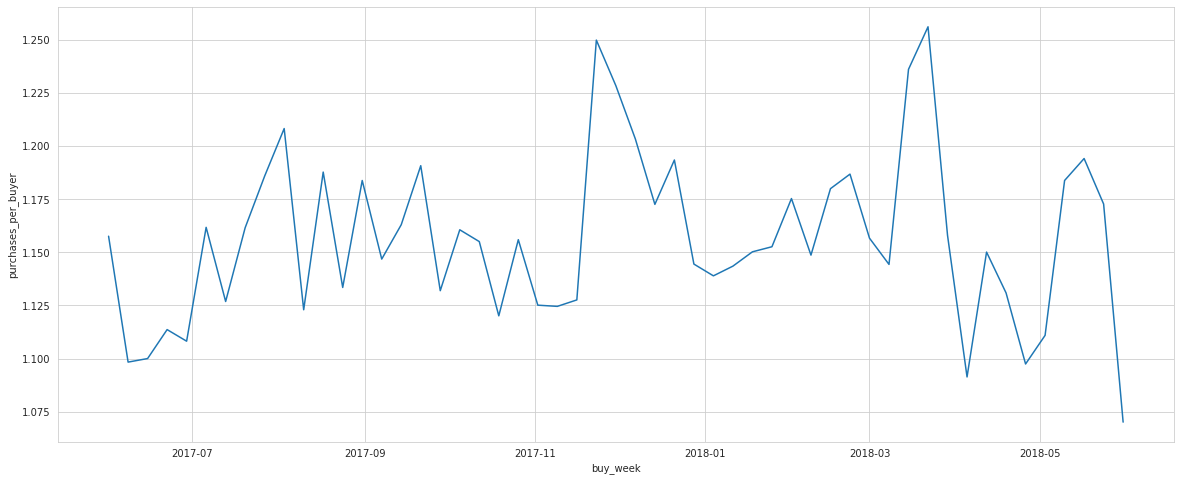

In [69]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
(sns.lineplot(x='buy_week', y='purchases_per_buyer', legend="full",
              data=general_purchases_w))

Последняя неделя декабря и марта -- лидеры вермени продаж

In [70]:
visits_correct.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19   
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20   
5  16007536194108375387    2017-09-01   2017-08-31   2017-09-03   
6   6661610529277171451    2018-01-01   2018-01-25   2018-01-30   

   session_duration  
0            1080.0  
1            1680.0  
3            1440.0  
5              60.0  
6            3360.0

Для построения графиков по устройствам и источникам понадобится таблица с визитами

Из таблицы визитов возьмем только покупателей

In [71]:
byers_visits = visits_correct[visits_correct['uid'].isin(orders['uid'].unique())]

sorted_visits = byers_visits.sort_values(by = ['uid', 'start_ts'])

Для каждого пользователя у нас теперь есть девайс, с которого он впервые зашел и источник.  
Найдем на каждого покупателя в месяц сумму покупок и количество покупок:

In [72]:
def purchases_per_period(visits_period, orders_period, sort_type, plot_title, figure):
    visits_periodically_grouped = (sorted_visits.groupby(['uid', visits_period])
                             .agg({'source_id':'first', 'device': 'first'})
                             .reset_index()
                      )
    
    orders_periodically_grouped = (orders.groupby(['uid', orders_period])
                                   .agg({'revenue': 'sum', 'buy_ts': 'count'})
                                   .reset_index()).rename(columns={'revenue': 'sum_revenue',
                                                                   'buy_ts': 'purchases_count'})
    
    visits_orders = (visits_periodically_grouped.merge(orders_periodically_grouped,
                           left_on=['uid', visits_period],
                           right_on=['uid', orders_period],
                           how='left'))
    
    period_orders_types = (visits_orders
                          .groupby([visits_period, sort_type])
                          .agg({'uid': 'nunique', 'purchases_count': 'sum', 'sum_revenue': 'sum'})
                          .reset_index())

    period_orders_types.columns = [visits_period, sort_type, 'users_count', 'purchases_count', 'period_revenue']
    period_orders_types['purchases_average'] = (period_orders_types['purchases_count'] / 
                                               period_orders_types['users_count'])
    
    period_orders_types['check_average'] = (period_orders_types['period_revenue'] / 
                                               period_orders_types['users_count'])

    if sort_type == 'device':
        plot_pallette = ["#9b59b6", "#3498db"]
    else:
        plot_pallette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#006400", "#F8FF06", "#A52A2A"]
    
    plt.figure(figsize=(20,8))
    sns.set_style("whitegrid")
    plt.title(plot_title)
    (sns.lineplot(x=visits_period, y=figure, hue=sort_type, legend="full", palette=plot_pallette,
                  data=period_orders_types))

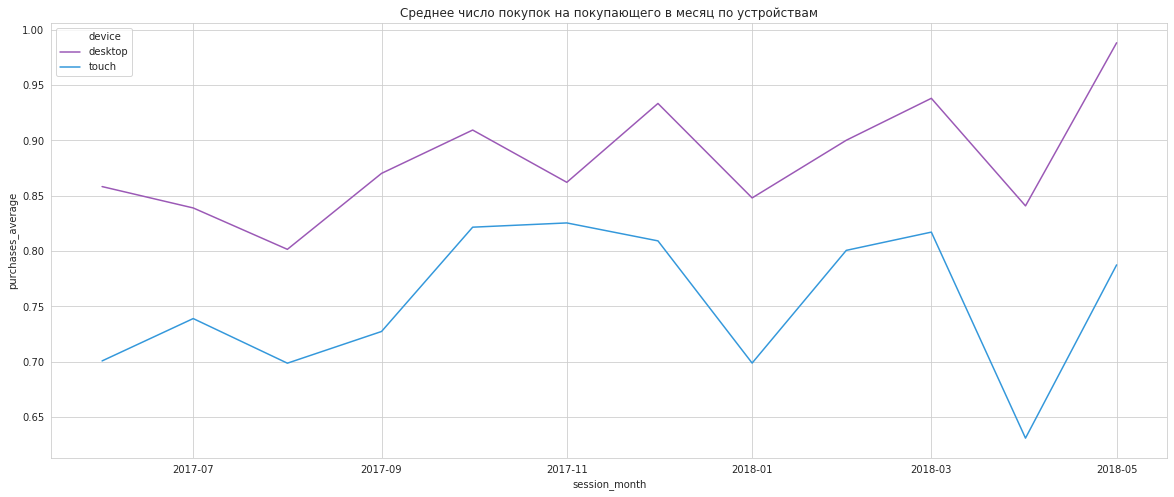

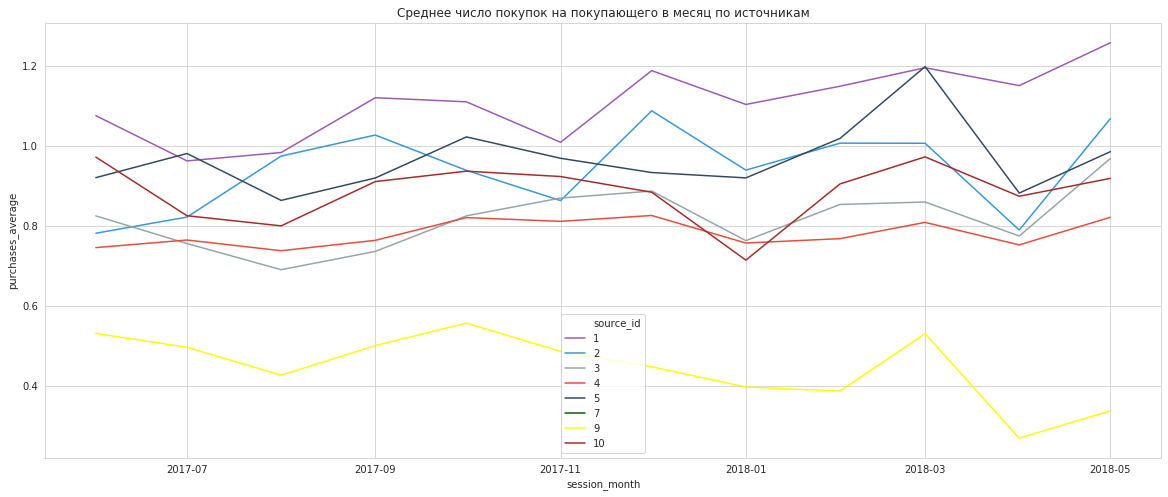

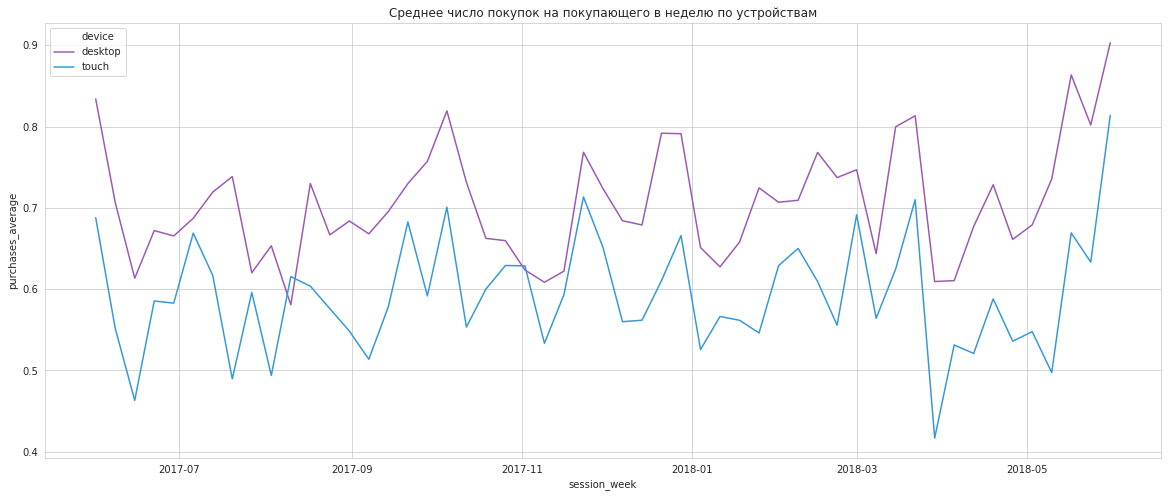

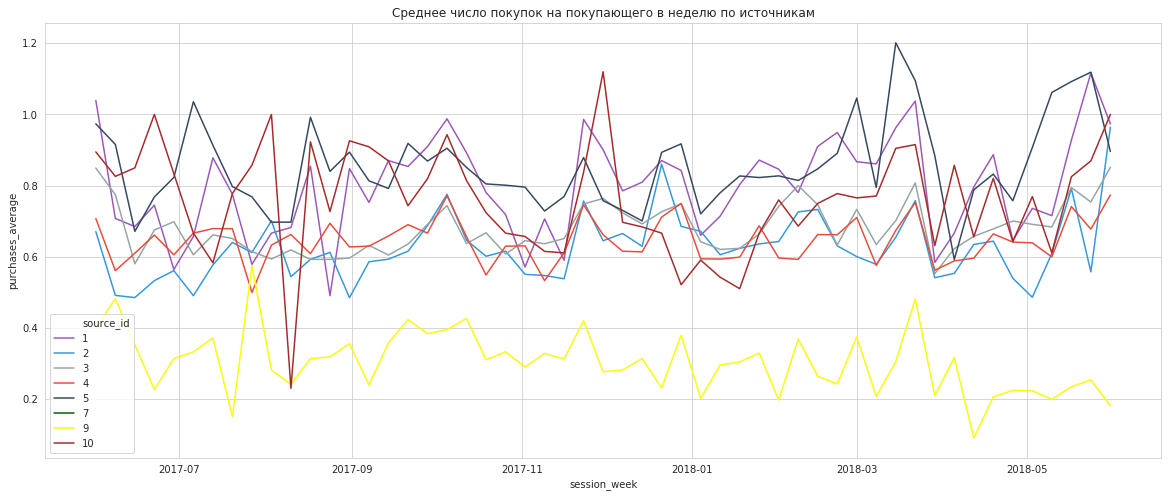

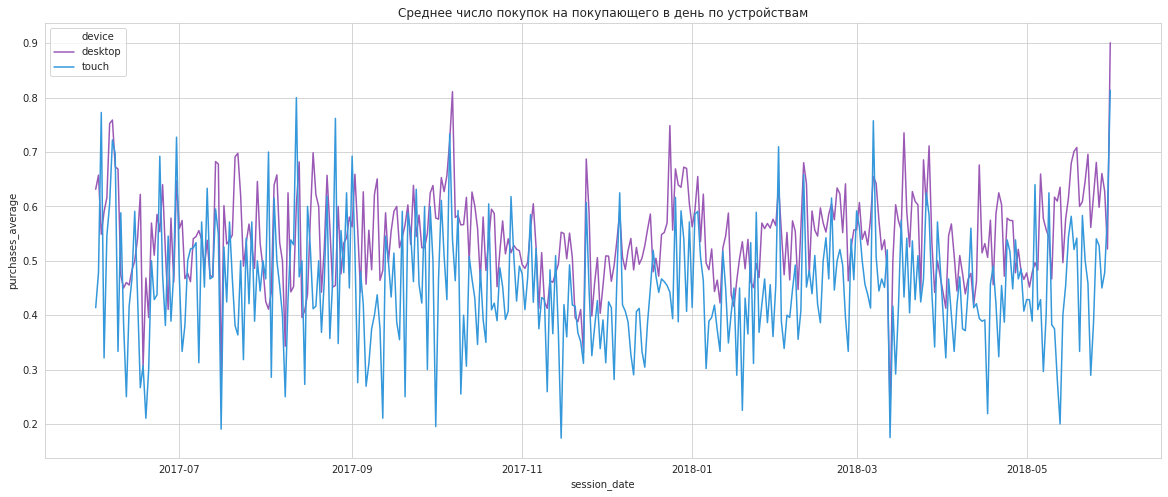

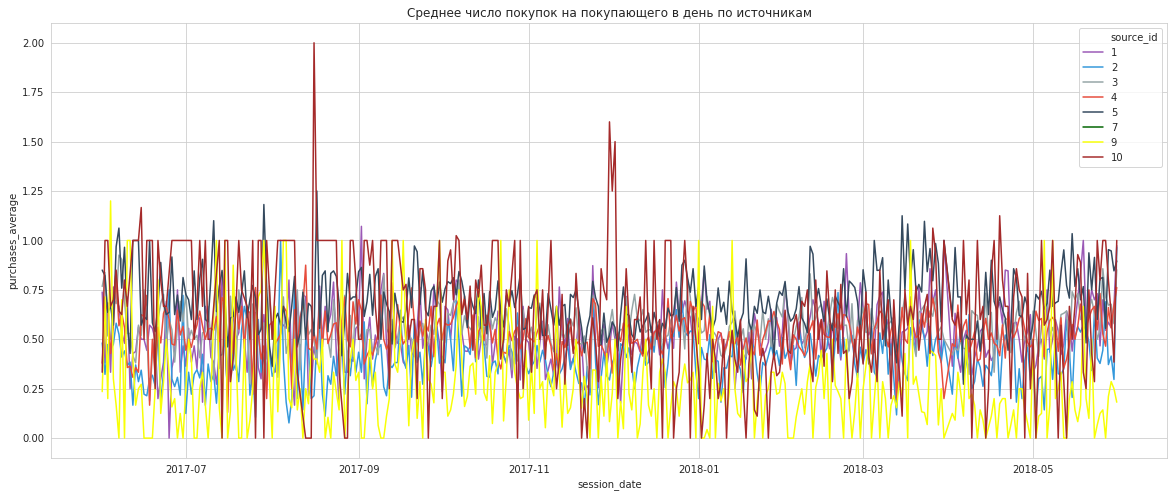

In [73]:
purchases_cases = [('session_month', 'buy_month', 'device', 'Среднее число покупок на покупающего в месяц по устройствам', 'purchases_average'),
                   ('session_month', 'buy_month', 'source_id', 'Среднее число покупок на покупающего в месяц по источникам', 'purchases_average'),
                  ('session_week', 'buy_week', 'device', 'Среднее число покупок на покупающего в неделю по устройствам', 'purchases_average'),
                  ('session_week', 'buy_week', 'source_id', 'Среднее число покупок на покупающего в неделю по источникам', 'purchases_average'),
                  ('session_date', 'buy_date', 'device', 'Среднее число покупок на покупающего в день по устройствам', 'purchases_average'),
                  ('session_date', 'buy_date', 'source_id', 'Среднее число покупок на покупающего в день по источникам', 'purchases_average')]


for case in purchases_cases:
    purchases_per_period(*case) 

**Как и ожидалось, с десктопа делают большее число покупок, чем с мобильных устройств.  
По источникам -- меньше всего покупок совершают с источника 9, больше всего с источника 1 и далее 2,5. С источника 10 самые значительные скачки, тут кто-то иногда покупает больше среднего в два раза.**

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Отлично, все графики подписаны, есть промежуточные выводы по расчетам и выводы в конце. 
</div>

---


### 2.2.3 Продажи. Какой средний чек?

Посмотрим на средний чек без распределения по устройствам/источникам

In [199]:
general_purchases_m[['buy_month', 'check_everage']]

buy_month  check_everage
0  2017-06-01       4.724414
1  2017-07-01       6.320297
2  2017-08-01       5.950258
3  2017-09-01       6.671095
4  2017-10-01       5.986674
5  2017-11-01       5.953360
6  2017-12-01       7.363132
7  2018-01-01       4.981306
8  2018-02-01       6.002945
9  2018-03-01       6.896577
10 2018-04-01       6.143608
11 2018-05-01       5.851010
12 2018-06-01       3.420000

In [200]:
general_purchases_m['check_everage'].describe()

count    13.000000
mean      5.866514
std       1.014569
min       3.420000
25%       5.851010
50%       5.986674
75%       6.320297
max       7.363132
Name: check_everage, dtype: float64

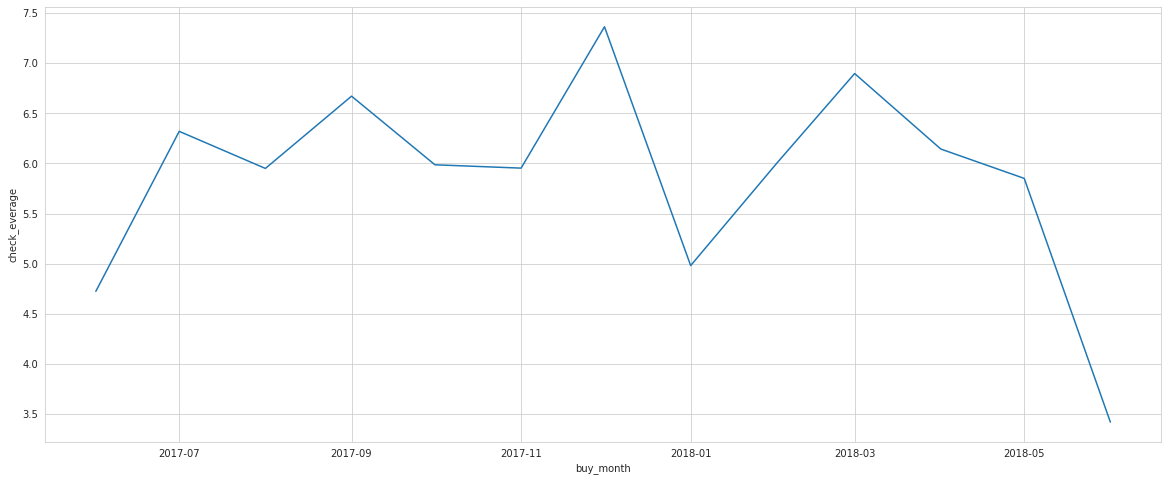

In [74]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
(sns.lineplot(x='buy_month', y='check_everage', legend="full",
              data=general_purchases_m))

In [75]:
general_purchases_m['check_everage'].describe()

count    13.000000
mean      5.866514
std       1.014569
min       3.420000
25%       5.851010
50%       5.986674
75%       6.320297
max       7.363132
Name: check_everage, dtype: float64

У большей части пользователей чек до 6 денежных единиц в месяц

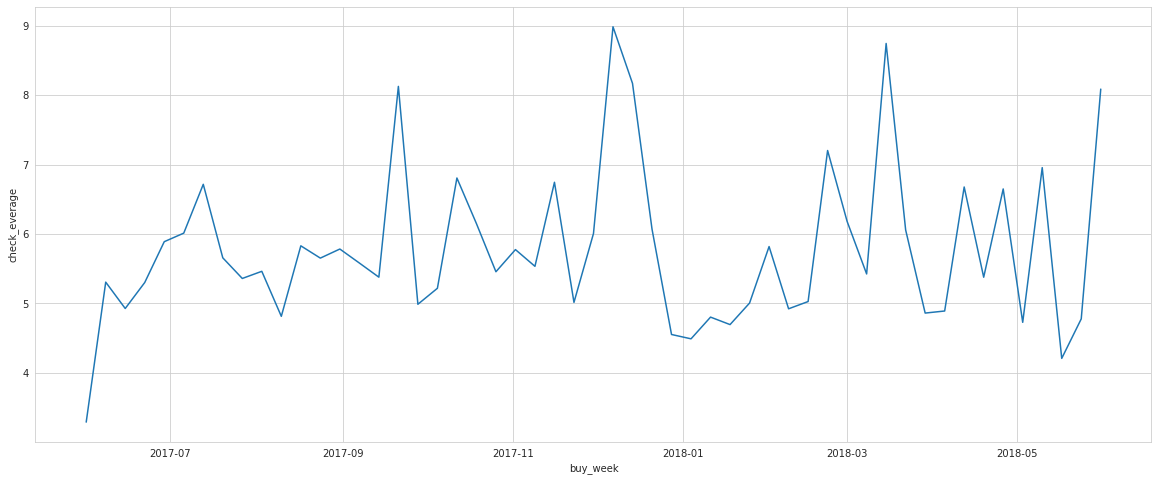

In [76]:
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
(sns.lineplot(x='buy_week', y='check_everage', legend="full",
              data=general_purchases_w))

Декабрь и март -- месяцы наибольшего расточительства.

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Отлично подмечено)
</div>

---


Теперь посмотрим для устройств и источников

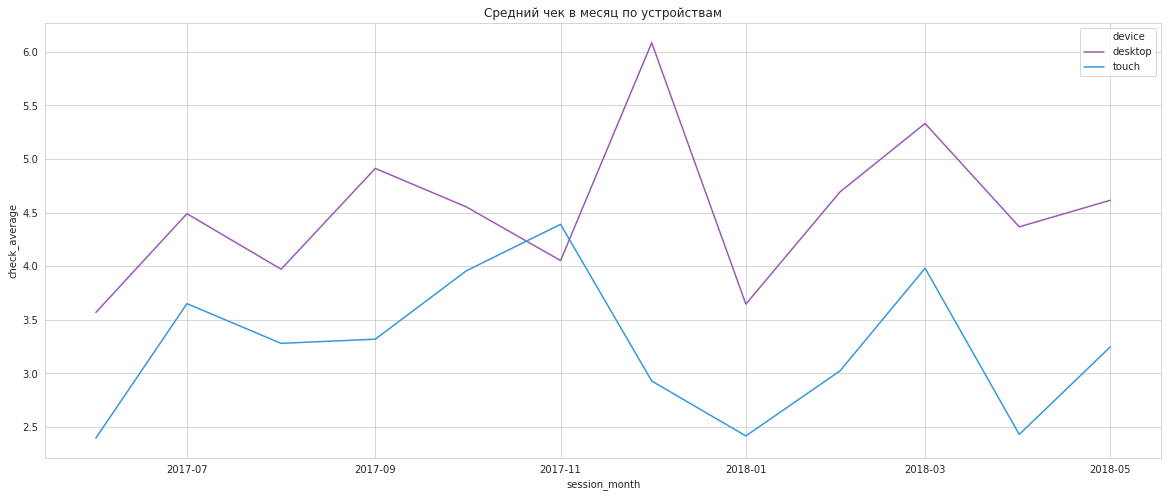

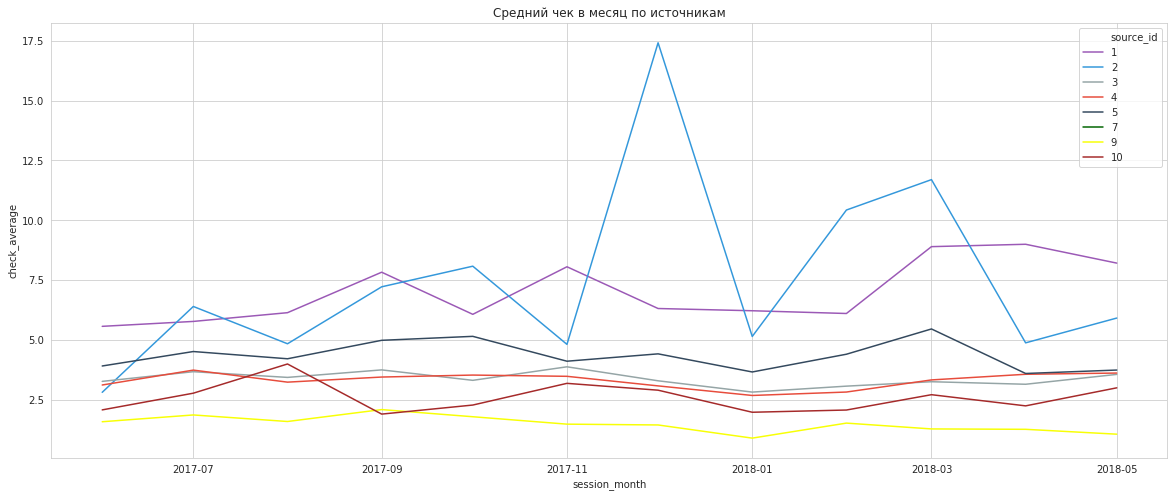

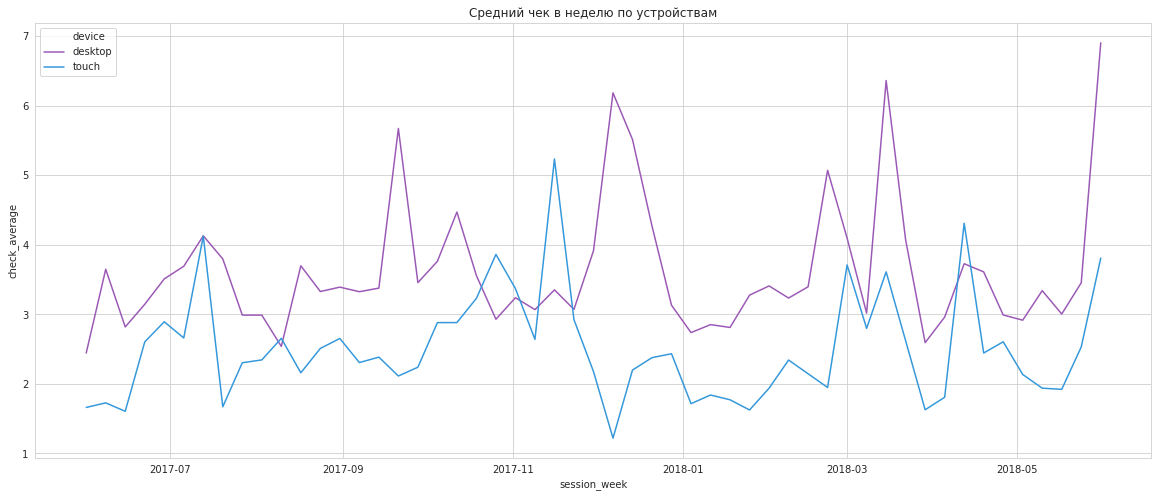

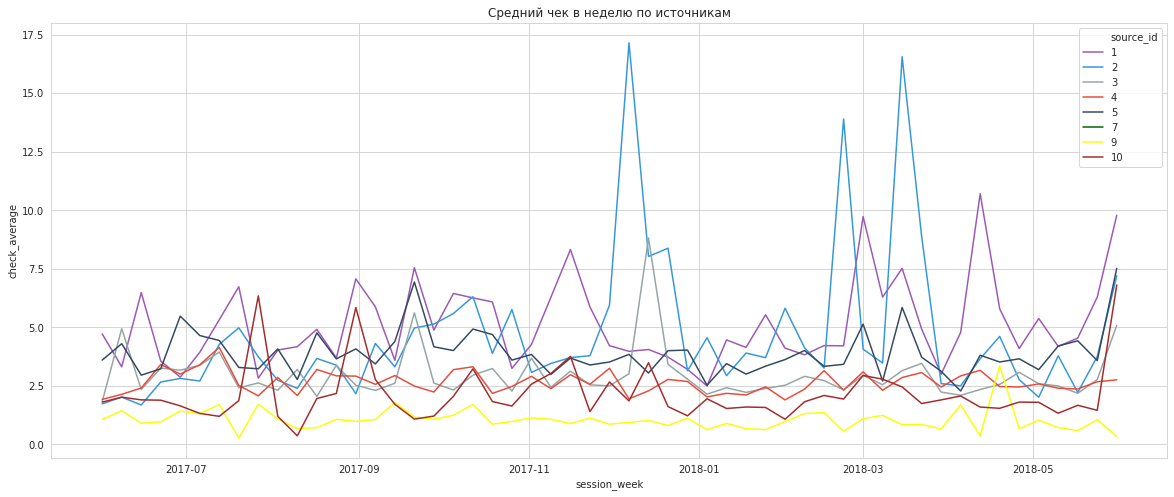

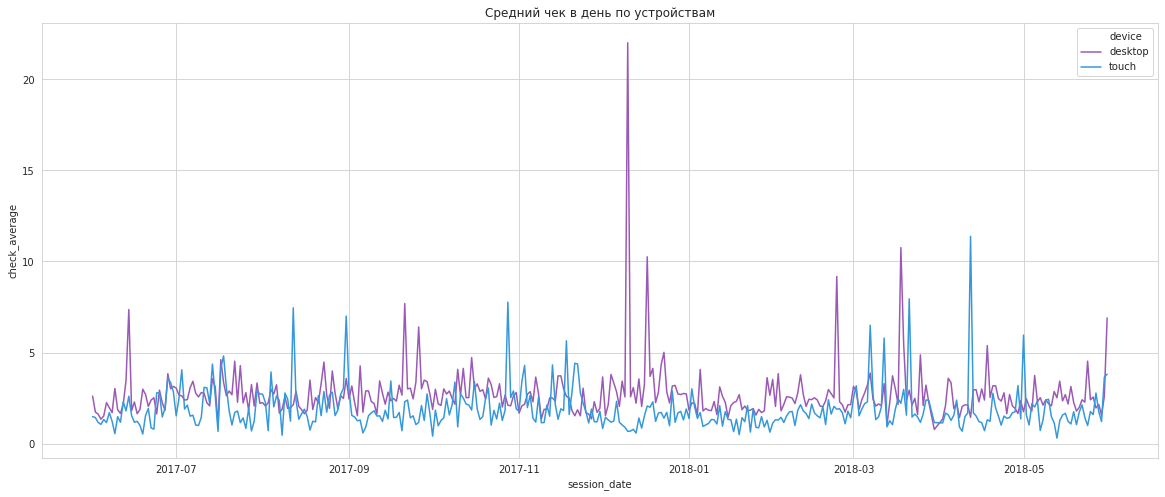

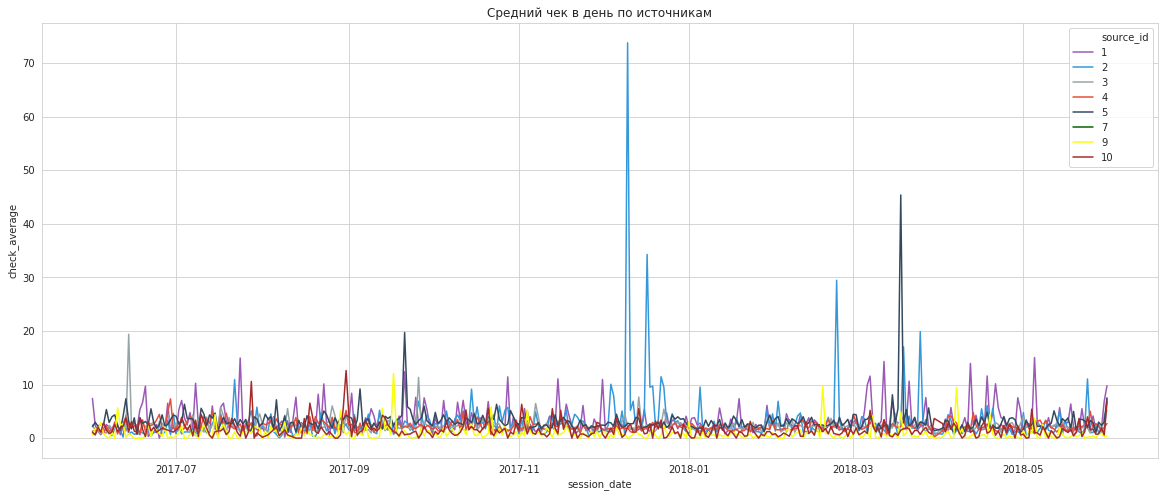

In [77]:
check_cases = [('session_month', 'buy_month', 'device', 'Средний чек в месяц по устройствам', 'check_average'),
                   ('session_month', 'buy_month', 'source_id', 'Средний чек в месяц по источникам', 'check_average'),
                  ('session_week', 'buy_week', 'device', 'Средний чек в неделю по устройствам', 'check_average'),
                  ('session_week', 'buy_week', 'source_id', 'Средний чек в неделю по источникам', 'check_average'),
                  ('session_date', 'buy_date', 'device', 'Средний чек в день по устройствам', 'check_average'),
                  ('session_date', 'buy_date', 'source_id', 'Средний чек в день по источникам', 'check_average')]


for case in check_cases:
    purchases_per_period(*case) 

**Источник 2 переодически славится большими средними чеками, с него больше всего покупают в декабре и в марте, за ним тянется источник 1, для этих источников средний чек колеблеться от 3.5 до 6 денежных единиц.  
В общем случае средний чек составляет примерно 6 денежных единиц.**


---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

На всякий случай напомню и тут, что метрики, которые получаешь в процессе нужно указывать в выводе. Ты верно вывела средний чек (главный ответ на вопрос), но он так и затерялся выше, где-то между графиков и таблиц 

</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Хорошо, важные метрики сразу видно
</div>

---


### 2.2.4. Продажи. Сколько денег приносят? (LTV)


In [78]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_month session_week session_date  
0  16879256277535980062    2017-12-01   2017-12-14   2017-12-20  
1    104060357244891740    2018-02-01   2018-02-15   2018-02-19  
2   7459035603376831527    2017-07-01   2017-06-29   2017-07-01  
3  16174680259334210214    2018-05-01   2018-05-17   2018-05-20  
4   9969694820036681168    2017-12-01   2017-12-21   2017-12-27

Выделим первые месяцы визитов, первые устройства и источники посещения для пользователей, чтобы в дальнейшем сформировать когорты

In [79]:
users = (visits
               .sort_values(by=['uid', 'start_ts'])
               .groupby('uid')
               .agg({'start_ts': 'first', 'device': 'first', 'source_id': 'first'})
               .rename(columns={'start_ts': 'acquisition_date'}) 
              )
users['acquisition_date'] = users['acquisition_date'].astype('datetime64[D]')
users['first_visit_month'] = users['acquisition_date'].astype('datetime64[M]')

users.head()


acquisition_date   device  source_id first_visit_month
uid                                                                   
11863502262781        2018-03-01    touch          3        2018-03-01
49537067089222        2018-02-06    touch          2        2018-02-01
297729379853735       2017-06-07  desktop          3        2017-06-01
313578113262317       2017-09-18  desktop          2        2017-09-01
325320750514679       2017-09-30  desktop          5        2017-09-01

In [80]:
orders.head()

buy_ts  revenue                   uid  buy_month   buy_week  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 2017-06-01   

    buy_date  
0 2017-06-01  
1 2017-06-01  
2 2017-06-01  
3 2017-06-01  
4 2017-06-01

Соединим таблицы пользователей с заказами, чтобы остались только покупатели

In [81]:
users_and_orders = (orders.set_index('uid').join(users, how='left')
                   )

users_and_orders = (users_and_orders[['revenue', 'buy_month', 'acquisition_date',
                                      'device', 'source_id', 'first_visit_month']])
users_and_orders.head()


revenue  buy_month acquisition_date   device  source_id  \
uid                                                                            
9223707061355654945     4.64 2017-10-01       2017-10-31    touch          9   
9224005701666002943     3.36 2017-12-01       2017-12-26  desktop          5   
9224005701666002943     3.67 2018-03-01       2017-12-26  desktop          5   
9225406053864431006     0.43 2017-12-01       2017-09-28  desktop          4   
9225479525411867039     7.33 2018-02-01       2018-02-25    touch          4   

                    first_visit_month  
uid                                    
9223707061355654945        2017-10-01  
9224005701666002943        2017-12-01  
9224005701666002943        2017-12-01  
9225406053864431006        2017-09-01  
9225479525411867039        2018-02-01

In [82]:
users_and_orders['buy_lifetime'] = (((users_and_orders['buy_month'] - users_and_orders['first_visit_month']) /
                                      np.timedelta64(1, 'M')).round().astype('int')
                                   )

После подсчета lifetime можно сделать общую функцию для нахождения ltv для всех видов формирования когорт

In [182]:
def get_ltv(cohort_group):
    ltv = (users_and_orders
              .merge(users_and_orders.reset_index()
              .groupby([cohort_group])
              .agg({'uid': 'nunique'}).reset_index(), on=cohort_group)
           .rename(columns={'uid': 'cohort_size'})
          )
    
    ltv = ltv.groupby([cohort_group, 'buy_lifetime']).agg({'revenue': 'sum', 'cohort_size': 'first'}).reset_index()
    ltv['ltv'] = ltv['revenue'] / ltv['cohort_size']
    ltv_pivot = ltv.pivot_table(index=cohort_group, columns='buy_lifetime', values='ltv', aggfunc='sum')
    ltv = ltv.set_index(cohort_group)
    
    ltv_pivot = ltv_pivot.cumsum(axis=1).round(2)
    plt.figure(figsize=(20, 9))
    plt.title('ltv: ' + cohort_group)
    sns.heatmap(ltv_pivot, annot=True, linewidths=1, linecolor='gray', fmt=".2f")
    
    return ltv

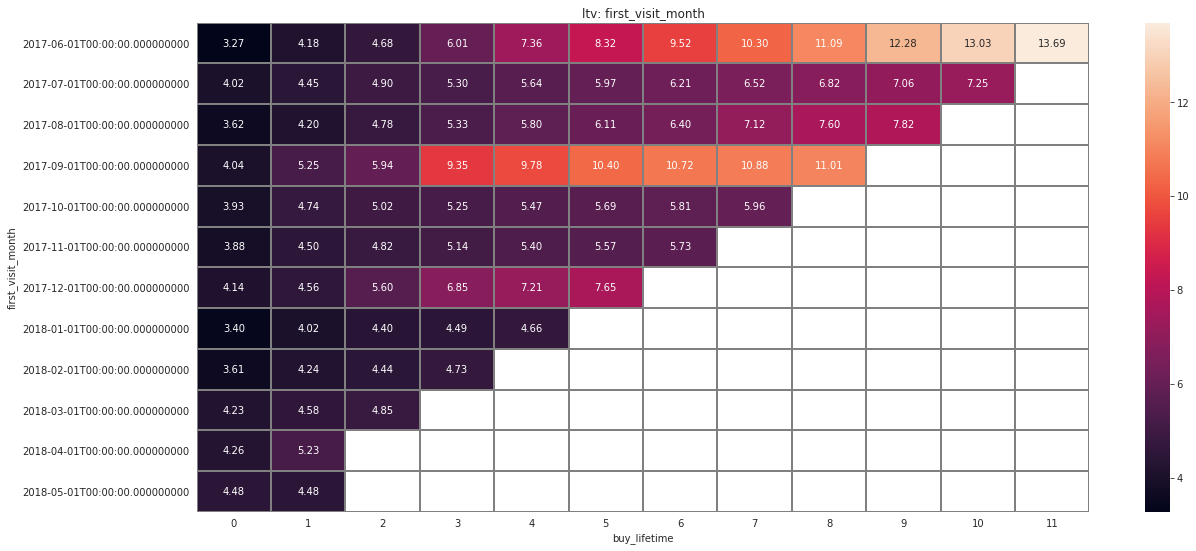

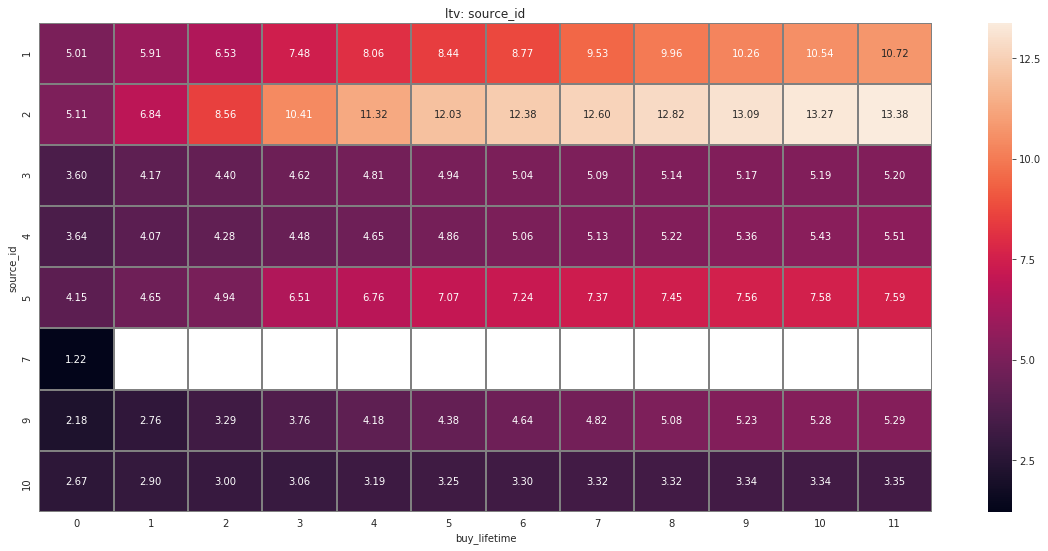

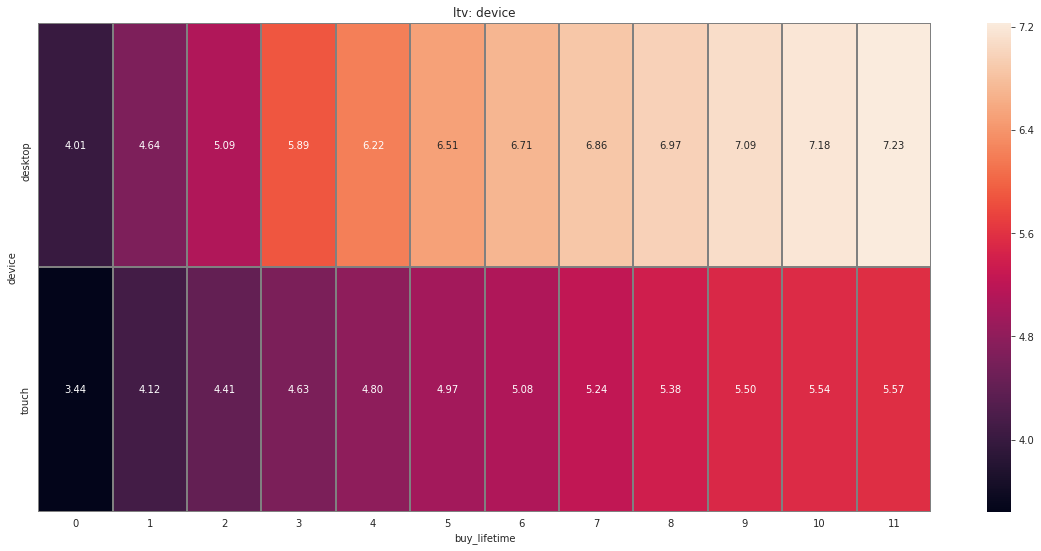

In [183]:
cohort_groups = ['first_visit_month', 'source_id', 'device']
ltvs = []
for gr in cohort_groups:
    ltvs.append(get_ltv(gr))        

**Когорты в разделении по месяцам:  
Для тех, кто успел дожить до 6 месяца жизни больше всего денег принесла когорта, пришедшая в сентябре -- 10.72 ден единицы принес всреднем один покупатель за 6 месяцев и когорта, пришедшая в июне -- 9.52 денеждные единицы.**

**Для когорт по устройствам:  
На 10 месяц жизни покупатьель с десктопа принес всреднем 7.18 ден единиц в отличие от покупателя с моб устройства -- 5.54** 

**Для когорт по источникам:  
На 10 месяц жизни больше всего приносят дениги покупатели из 2 и 1 источников -- 13.27 и 10.54 соответственно, так же 5 источник -- 7.58 ден единиц**

---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера

LTV удобней смотреть накопительно, чтобы можно было сделать выводы точнее. Можно использовать "cumsum" вместо "sum", тогда итог будет выводиться накопительно для каждого месяца жизни когорты
</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Здорово, что учла рекомендацию
</div>

---


## 2.3. Маркетинг
Сколько денег потратили? Всего / на каждый источник / по времени  
Сколько стоило привлечение одного покупателя из каждого источника? (CAC)     

На сколько окупились расходы? (ROI) 

### 2.3.1 Маркетинг. Сколько денег потратили? Всего / на каждый источник / по времени

Информацию о расходах на устройство можно получить если расчитать цену привлечения отдельного пользователя в отдельный день из источника, а потом сделать группировку по устройствам, с которых пользователи приходили в свой первый визит.

In [85]:
costs_all = costs
costs.head()

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

Узнаем общую сумму затрат за весь период

In [86]:
costs['costs'].sum()

329131.62

Посмотрим, как производились затраты по месяцам и неделям

In [87]:
costs_all['costs_month'] = costs_all['dt'].astype('datetime64[M]') 
costs_all['costs_week']  = costs_all['dt'].astype('datetime64[W]') 
costs_all.head()

source_id         dt  costs costs_month costs_week
0          1 2017-06-01  75.20  2017-06-01 2017-06-01
1          1 2017-06-02  62.25  2017-06-01 2017-06-01
2          1 2017-06-03  36.53  2017-06-01 2017-06-01
3          1 2017-06-04  55.00  2017-06-01 2017-06-01
4          1 2017-06-05  57.08  2017-06-01 2017-06-01

In [88]:
costs_per_month = costs_all.groupby('costs_month').agg({'costs': 'sum'}).reset_index()
costs_per_week = costs_all.groupby('costs_week').agg({'costs': 'sum'}).reset_index()


In [89]:
costs_per_month['costs'].describe()

count       12.000000
mean     27427.635000
std       8405.071207
min      14790.540000
25%      21228.350000
50%      27392.090000
75%      34219.610000
max      38315.350000
Name: costs, dtype: float64

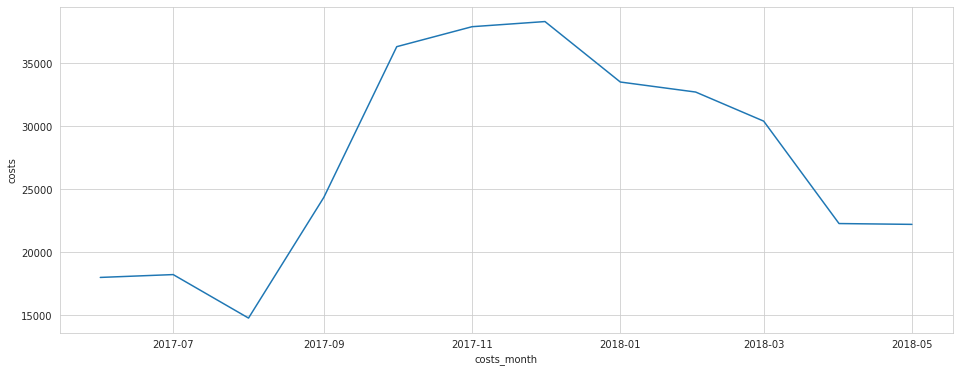

In [90]:
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")
(sns.lineplot(x='costs_month', y='costs',
              data=costs_per_month))

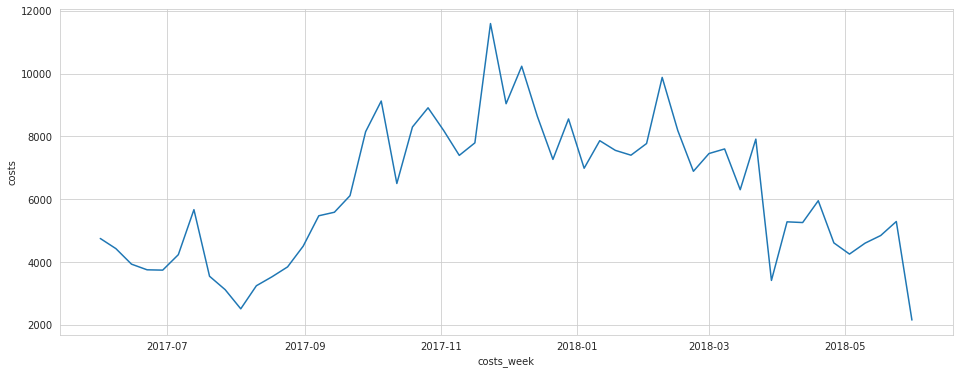

In [91]:
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")
(sns.lineplot(x='costs_week', y='costs',
              data=costs_per_week))

**Расходы на привлечение пользователей начали расти с августа 2017 года, так же заметно их увеличение в декабре, тогда и на сайт приходило больше всего пользователей**

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера

Хорошо что возвращаешься к своим предыдущим наблюдениям

</div>

---


In [92]:
costs_source_per_month = costs_all.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index()
costs_source_per_week = costs_all.groupby(['source_id', 'costs_week']).agg({'costs': 'sum'}).reset_index()

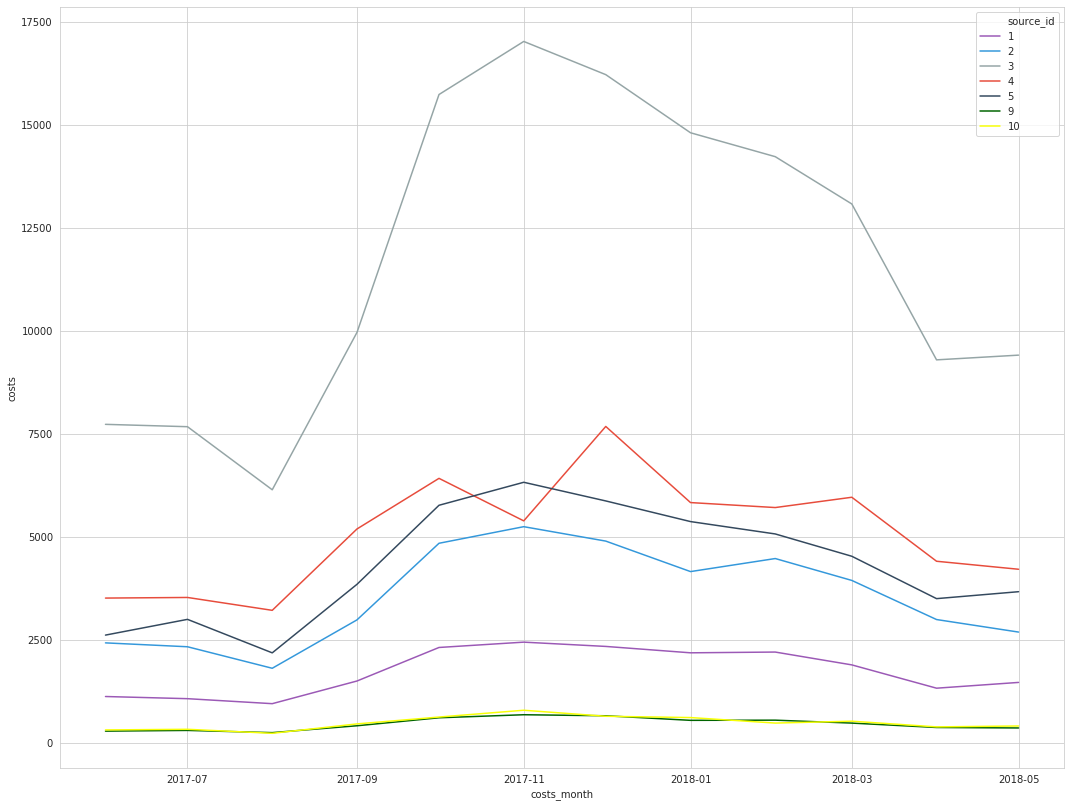

In [93]:
plt.figure(figsize=(18,14))
sns.set_style("whitegrid")
(sns.lineplot(x='costs_month', y='costs', hue='source_id', legend="full",
              palette=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#006400", "#F8FF06"],
              data=costs_source_per_month))

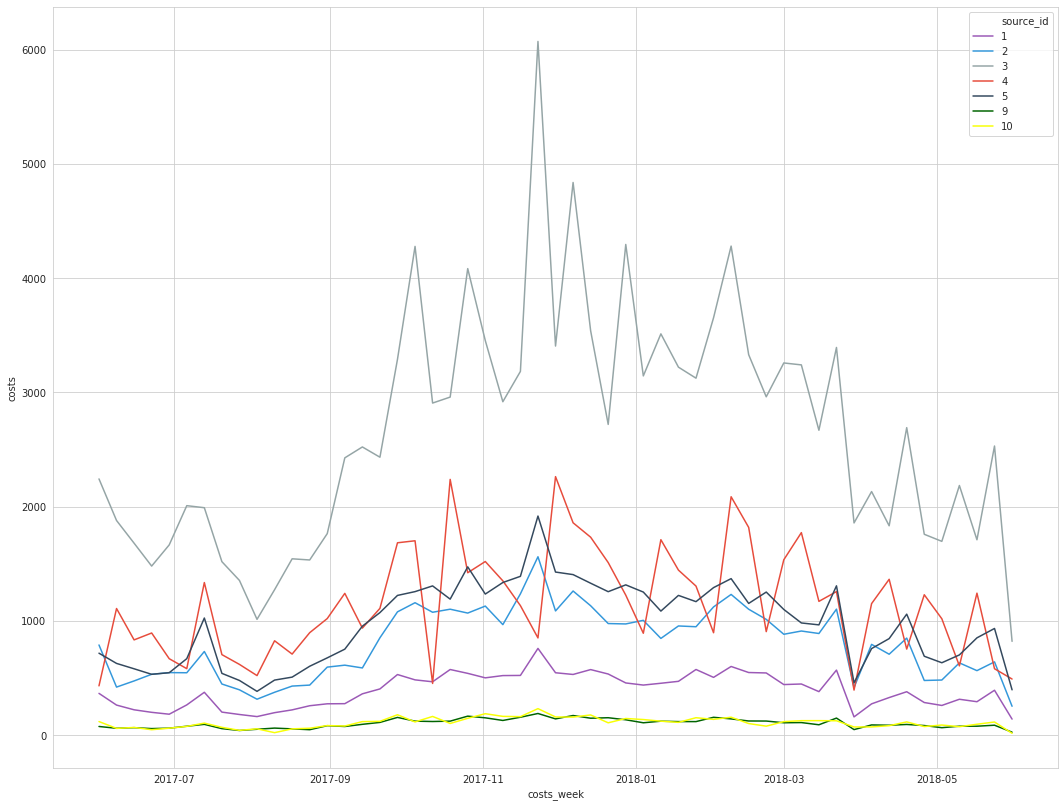

In [94]:
plt.figure(figsize=(18,14))
sns.set_style("whitegrid")
(sns.lineplot(x='costs_week', y='costs', hue='source_id', legend="full",
              palette=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#006400", "#F8FF06"],
              data=costs_source_per_week))

In [195]:
costs.groupby(['source_id']).agg({'costs': 'sum'}).sort_values(by=['costs'])


costs
source_id           
9            5517.49
10           5822.49
1           20833.27
2           42806.04
5           51757.10
4           61073.60
3          141321.63

**За все время самым дорогостоящим оказался источник 3, на него потратили 141321 денежных единиц. Но из предыдущих исследований нельзя сказать, он принес какой-то успех.  
Кроме того на временных графиках можно заметить, что расходы по источникам так же увеличивались, в те периоды, которые считаются более активными на графиках посещений: с сентября по март.**

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера
Все верно на графиках, но не увидела вывод, сколько же все-таки потратили денег на каждый источник
    

</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Супер, еще и проранжировала!
</div>

---


### 2.3.2 Маркетинг. Сколько стоило привлечение одного покупателя из каждого источника? (CAC)  


In [95]:
users.head()

acquisition_date   device  source_id first_visit_month
uid                                                                   
11863502262781        2018-03-01    touch          3        2018-03-01
49537067089222        2018-02-06    touch          2        2018-02-01
297729379853735       2017-06-07  desktop          3        2017-06-01
313578113262317       2017-09-18  desktop          2        2017-09-01
325320750514679       2017-09-30  desktop          5        2017-09-01

In [96]:
costs.head()

source_id         dt  costs costs_month costs_week
0          1 2017-06-01  75.20  2017-06-01 2017-06-01
1          1 2017-06-02  62.25  2017-06-01 2017-06-01
2          1 2017-06-03  36.53  2017-06-01 2017-06-01
3          1 2017-06-04  55.00  2017-06-01 2017-06-01
4          1 2017-06-05  57.08  2017-06-01 2017-06-01

In [97]:
costs = costs.rename(columns={'dt': 'acquisition_date'})

Объединим таблицы с пользователями и издержками, выбрав из пользователей только покупателей. Склеивать таблицы будем по источникам и дню первого посещения (в таблице пользователей)

In [98]:
users = users.reset_index()
payers = users[users['uid'].isin(orders['uid'].unique())]
payers.head()

uid acquisition_date   device  source_id first_visit_month
3    313578113262317       2017-09-18  desktop          2        2017-09-01
22  1575281904278712       2017-06-03    touch         10        2017-06-01
35  2429014661409475       2017-10-11  desktop          3        2017-10-01
36  2464366381792757       2018-01-27  desktop          5        2018-01-01
38  2551852515556206       2017-11-24  desktop          5        2017-11-01

In [99]:
payers_costs = (payers.set_index(['source_id', 'acquisition_date'])
                .join(costs.set_index(['source_id', 'acquisition_date']), how='left')
               )
payers_costs.head()

uid   device first_visit_month  \
source_id acquisition_date                                                   
1         2017-06-01         469568501030474895  desktop        2017-06-01   
          2017-06-01        1074355127080856382  desktop        2017-06-01   
          2017-06-01        1292867924428534308  desktop        2017-06-01   
          2017-06-01        2050423809815667474  desktop        2017-06-01   
          2017-06-01        3520273333047097992  desktop        2017-06-01   

                            costs costs_month costs_week  
source_id acquisition_date                                
1         2017-06-01         75.2  2017-06-01 2017-06-01  
          2017-06-01         75.2  2017-06-01 2017-06-01  
          2017-06-01         75.2  2017-06-01 2017-06-01  
          2017-06-01         75.2  2017-06-01 2017-06-01  
          2017-06-01         75.2  2017-06-01 2017-06-01

Посчитаем стоимость привлечения каждого покупателя.

In [100]:
costs_per_payers = payers_costs.groupby(['source_id', 'acquisition_date']).agg({'uid': 'count', 'costs': 'first'})
costs_per_payers['costs_per_payers'] = costs_per_payers['costs'] / costs_per_payers['uid']
costs_per_payers.head()

uid  costs  costs_per_payers
source_id acquisition_date                              
1         2017-06-01         24  75.20          3.133333
          2017-06-02         12  62.25          5.187500
          2017-06-03          8  36.53          4.566250
          2017-06-04          6  55.00          9.166667
          2017-06-05         20  57.08          2.854000

In [101]:
payers_costs = payers_costs.join(costs_per_payers[['costs_per_payers']], how='left')
payers_costs.head()

uid   device first_visit_month  \
source_id acquisition_date                                                   
1         2017-06-01         469568501030474895  desktop        2017-06-01   
          2017-06-01        1074355127080856382  desktop        2017-06-01   
          2017-06-01        1292867924428534308  desktop        2017-06-01   
          2017-06-01        2050423809815667474  desktop        2017-06-01   
          2017-06-01        3520273333047097992  desktop        2017-06-01   

                            costs costs_month costs_week  costs_per_payers  
source_id acquisition_date                                                  
1         2017-06-01         75.2  2017-06-01 2017-06-01          3.133333  
          2017-06-01         75.2  2017-06-01 2017-06-01          3.133333  
          2017-06-01         75.2  2017-06-01 2017-06-01          3.133333  
          2017-06-01         75.2  2017-06-01 2017-06-01          3.133333  
          2017-06-01         75.2  2017-06-01 2017-06-01          3.133333

Вынесем в функцию общие для всех группировок подсчеты

In [102]:
def get_cac(cohort_group):  
    cac = (payers_costs.reset_index()
        .groupby(cohort_group)
        .agg({'uid': 'count', 'costs_per_payers': 'sum'}))

    cac['cac'] = cac['costs_per_payers'] / cac['uid']
    
    return cac


In [103]:
# из предыдущих строк: cohort_groups = ['first_visit_month', 'source_id', 'device']
cacs = []
for gr in cohort_groups:
    cacs.append(get_cac(gr))

In [104]:
cacs[0]['cac']

first_visit_month
2017-06-01     6.130996
2017-07-01     7.350224
2017-08-01     8.466223
2017-09-01     7.932623
2017-10-01     7.757185
2017-11-01     8.872349
2017-12-01     9.359597
2018-01-01    10.670943
2018-02-01    10.213820
2018-03-01    10.668735
2018-04-01    11.657312
2018-05-01     9.513053
Name: cac, dtype: float64

In [105]:
cacs[1]['cac']

source_id
1      7.171449
2     12.176372
3     13.493901
4      5.930255
5      7.467378
7      0.000000
9      3.858318
10     4.064169
Name: cac, dtype: float64

In [106]:
cacs[2]['cac']

device
desktop    9.009724
touch      8.757168
Name: cac, dtype: float64

**Дороже всего обошлось привлечение пользователя с января по апрель 2018 -- 10 - 11 денеждых единиц на пользователя.  
Для источников, самые дорогостоящие 2 и 3, здесь получается, что на привлечения пользователя потратили 12 и 13 денежных единиц.**

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Подсчеты верные, подведи итог в конце раздела и будет идельно)
</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Отлично )

</div>

---


### 2.3.3. Маркетинг. На сколько окупились расходы? (ROI)
 

У нас есть списки с cac (cacs) и с ltv (ltvs) для каждого варианта группировки когорт, порядок в каждом из листов одинаков. Посчитаем накопительный roi:

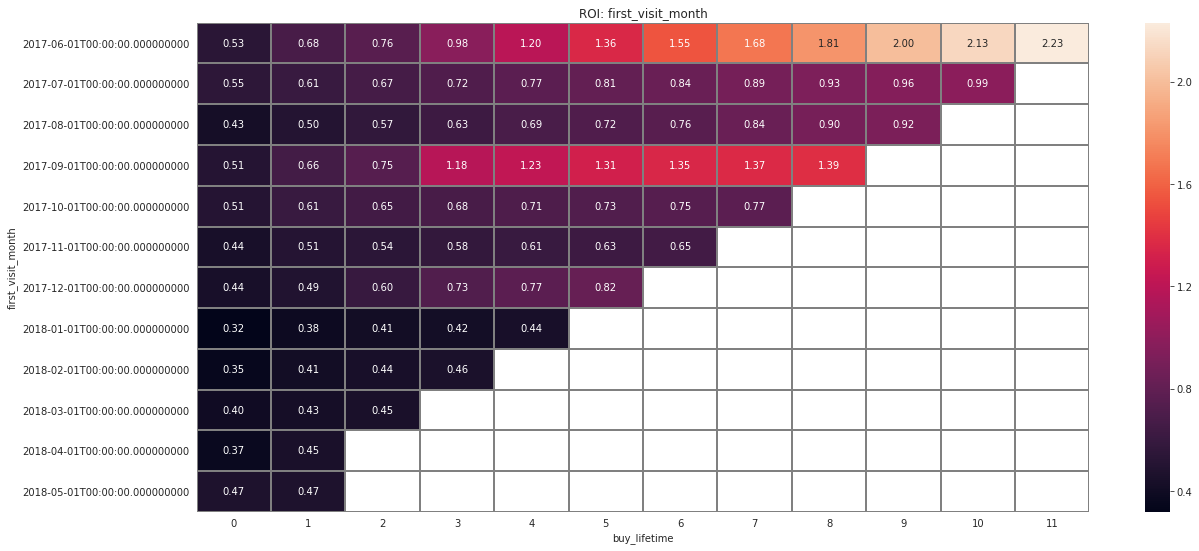

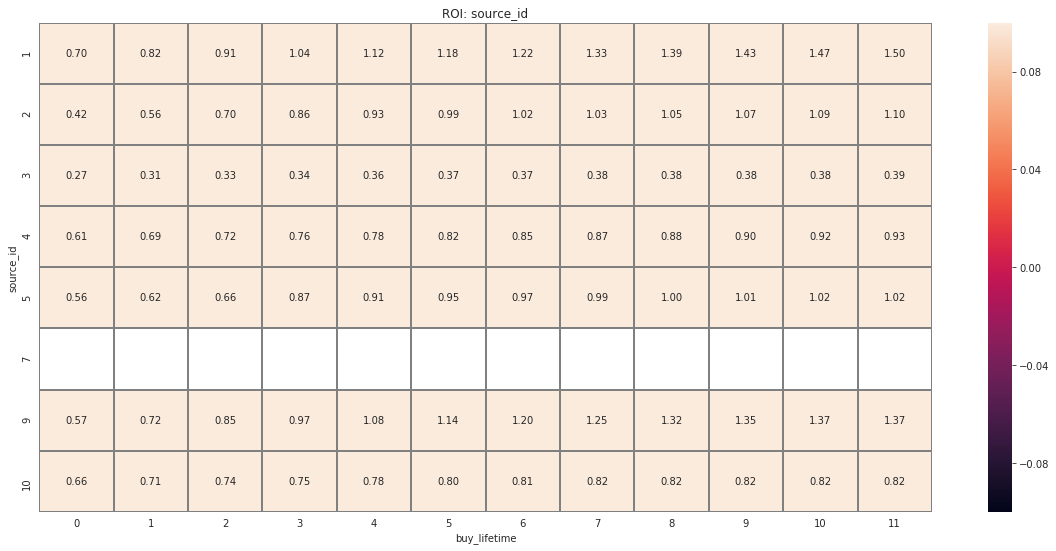

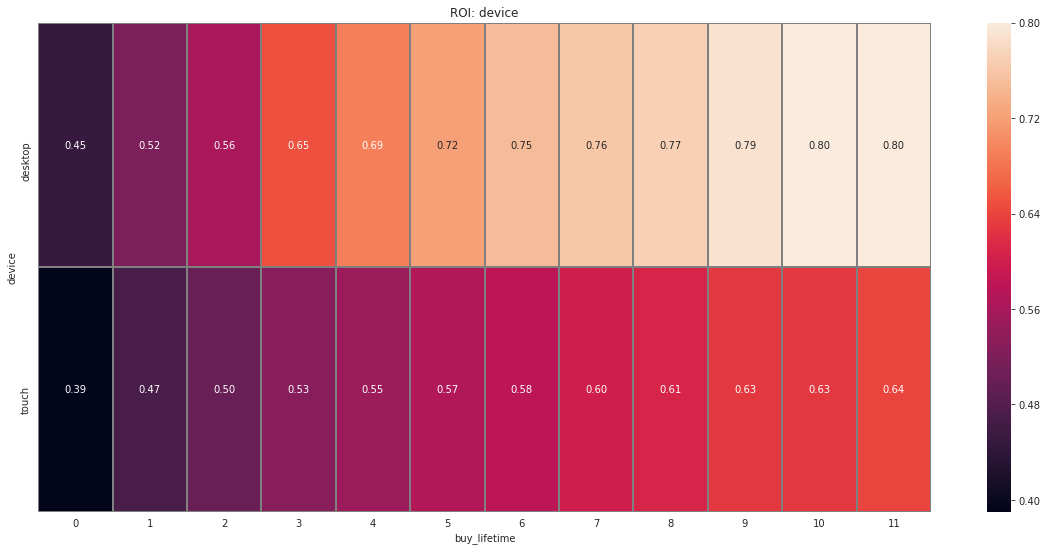

In [196]:

for i, ltv in enumerate(ltvs):
    roi = ltv.join(cacs[i], how='left')
    roi['roi'] = roi['ltv'] / roi['cac']
    
    roi_pivot = roi.pivot_table(index=ltv.index.name, columns='buy_lifetime', values='roi', aggfunc='sum')
    roi_pivot = roi_pivot.cumsum(axis=1).round(2)
    plt.figure(figsize=(20, 9))
    plt.title('ROI: ' + ltv.index.name)
    sns.heatmap(roi_pivot, annot=True, linewidths=1, linecolor='gray', fmt=".2f")


**В когортах по месяцам судя по накопительному roi на 6 месяце жизни окупают себя те покупатели, которые были привлечены в июне и сентябре 2017, другие же когорты (с июня по ноябрь) --  к 6 месяцу затрат на привлечение покупателя в них все еще больше, чем в среднем привлеченные покупатель принес.  
Если смотреть по источникам, на 6 месяц жизни окупается 1,2 и 9 источники, на 10 месяц к ним добавляется 5 источник. Пользователи из 1 и 9 источников на 6 месяц начинают приносить наибольший доход, около 20% (roi 1.22 и 1.20) на 11 месяце жизни 47% и 37%**

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Здесь, как мне кажется, есть определенная проблема с тем, что когорты прожили не одинаковое количество времени. Лучше выбрать условное "время жизни" когорты, и считать результативность исходя из него -- например, 6 месяцев -- чтобы не слишком много когорт отсечь, потому что они прожили меньше этого времени. И главное смотреть, чтобы когорты прожили это время)
    
Ну и мое прежнее пожелание - нужна конкретика в выводах
</div>

---


---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера V2

Отличные выводы и с расчетом стало все корректно
</div>

---


## 3. Рекомендации

#### Для начала подытожим, что нам удалось узнать:  
Больше всего пользователи посещают сайт в период с октября по март, в эти месяцы посещаемость превышает среднюю (23228 пользователей в месяц), составляет 25-30 тыс человек.  
Сайт больше посещают с десктоп устройств, в среднем в месяц 16725 на десктоп устройствах и 6824 на мобильных. Около 75% посещающих сайт, проводят там не больше 15 минут, заходя в день редко больше 1 раза.  
В первый раз приходит большое количество пользователей, но лишь около 5% остается на следующий месяц.   
Половина пользователей покупает в первый день визита в течении 5 часов с момента первого посещения. 

#### Источники:  
Самая большая посещаемость: 4, 3, 5 

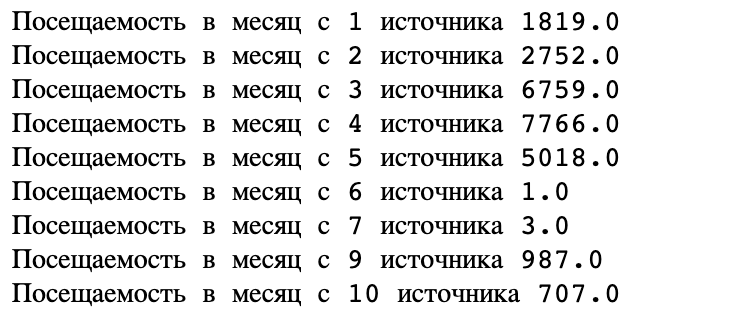


Самые длинные сессии: 1, 2, 10
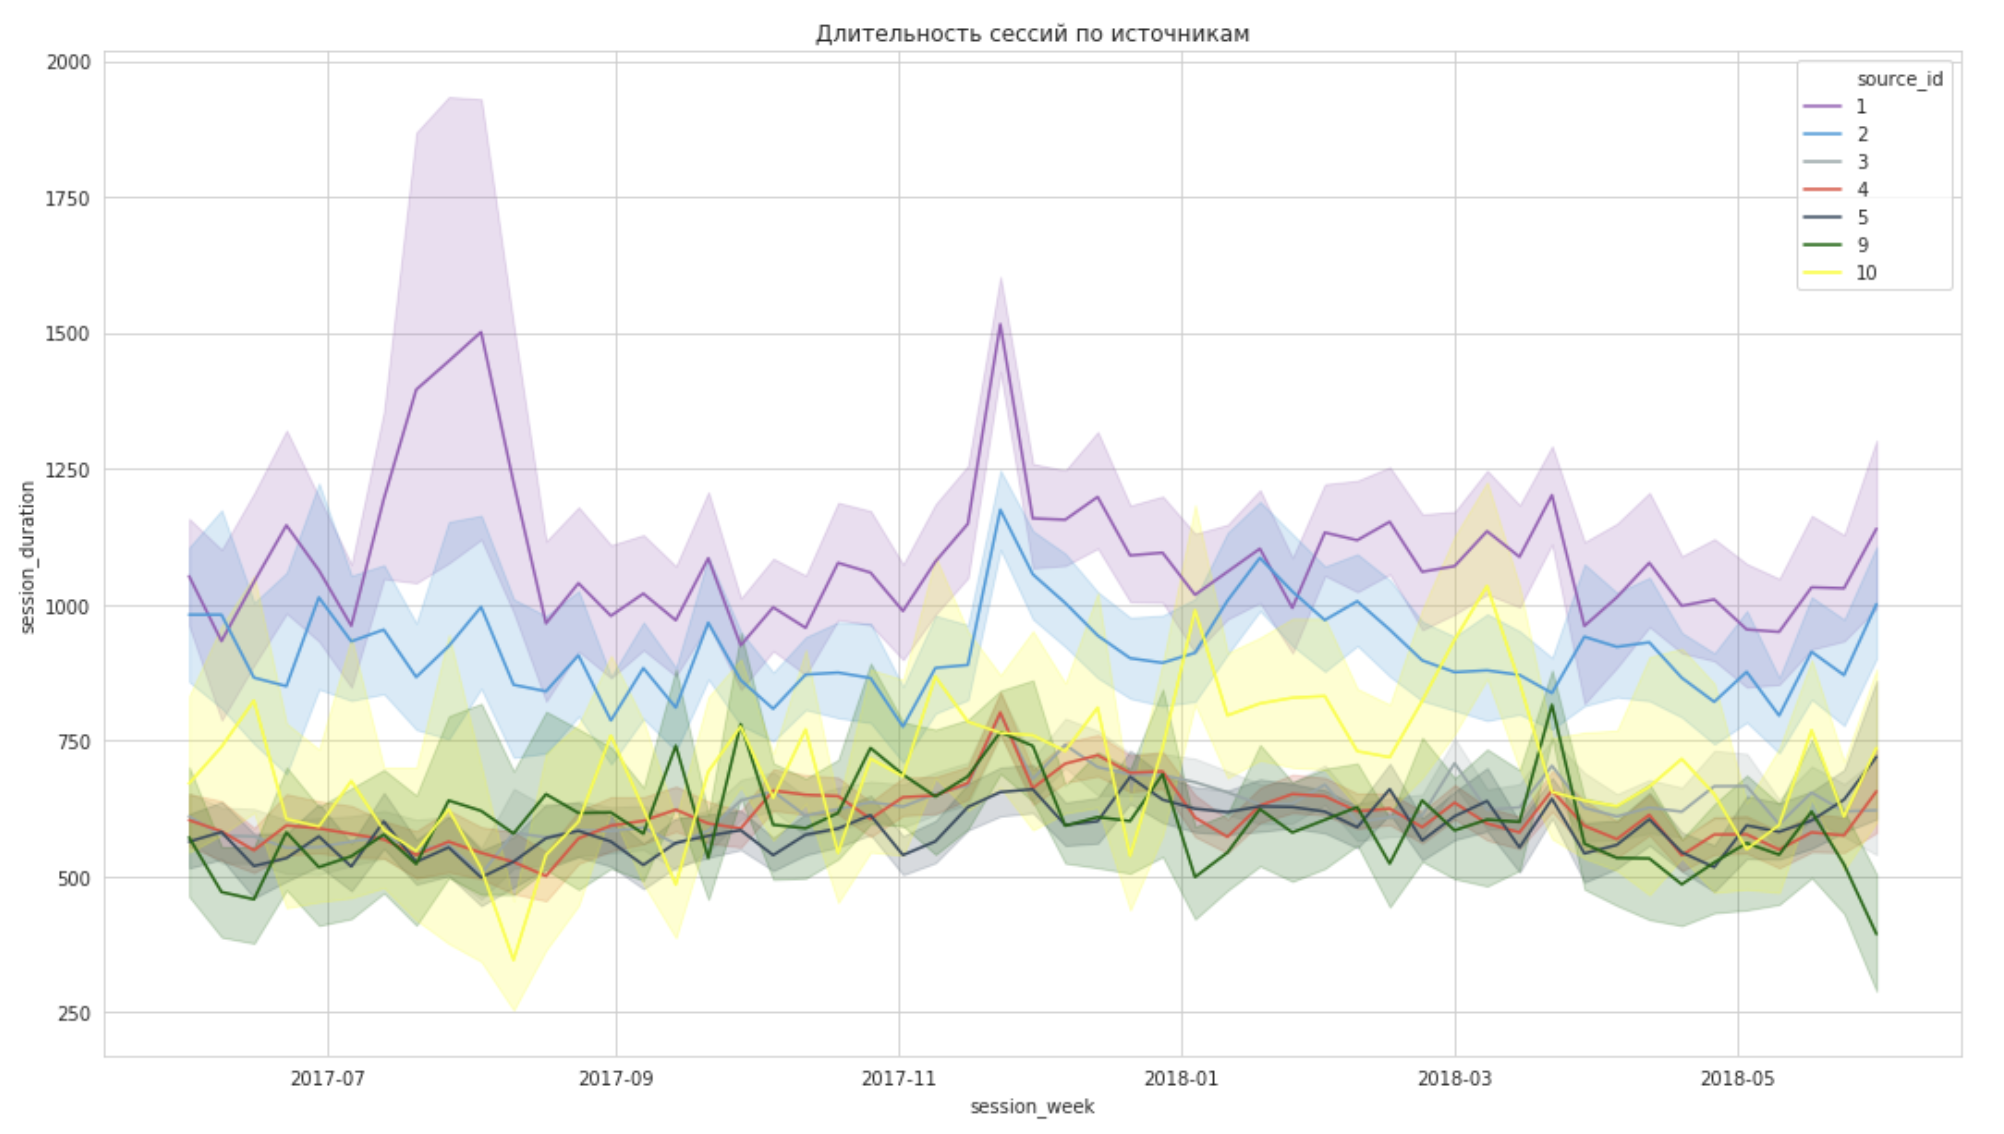

Чаще всего пользователи возвращаются: 1, 2, 9
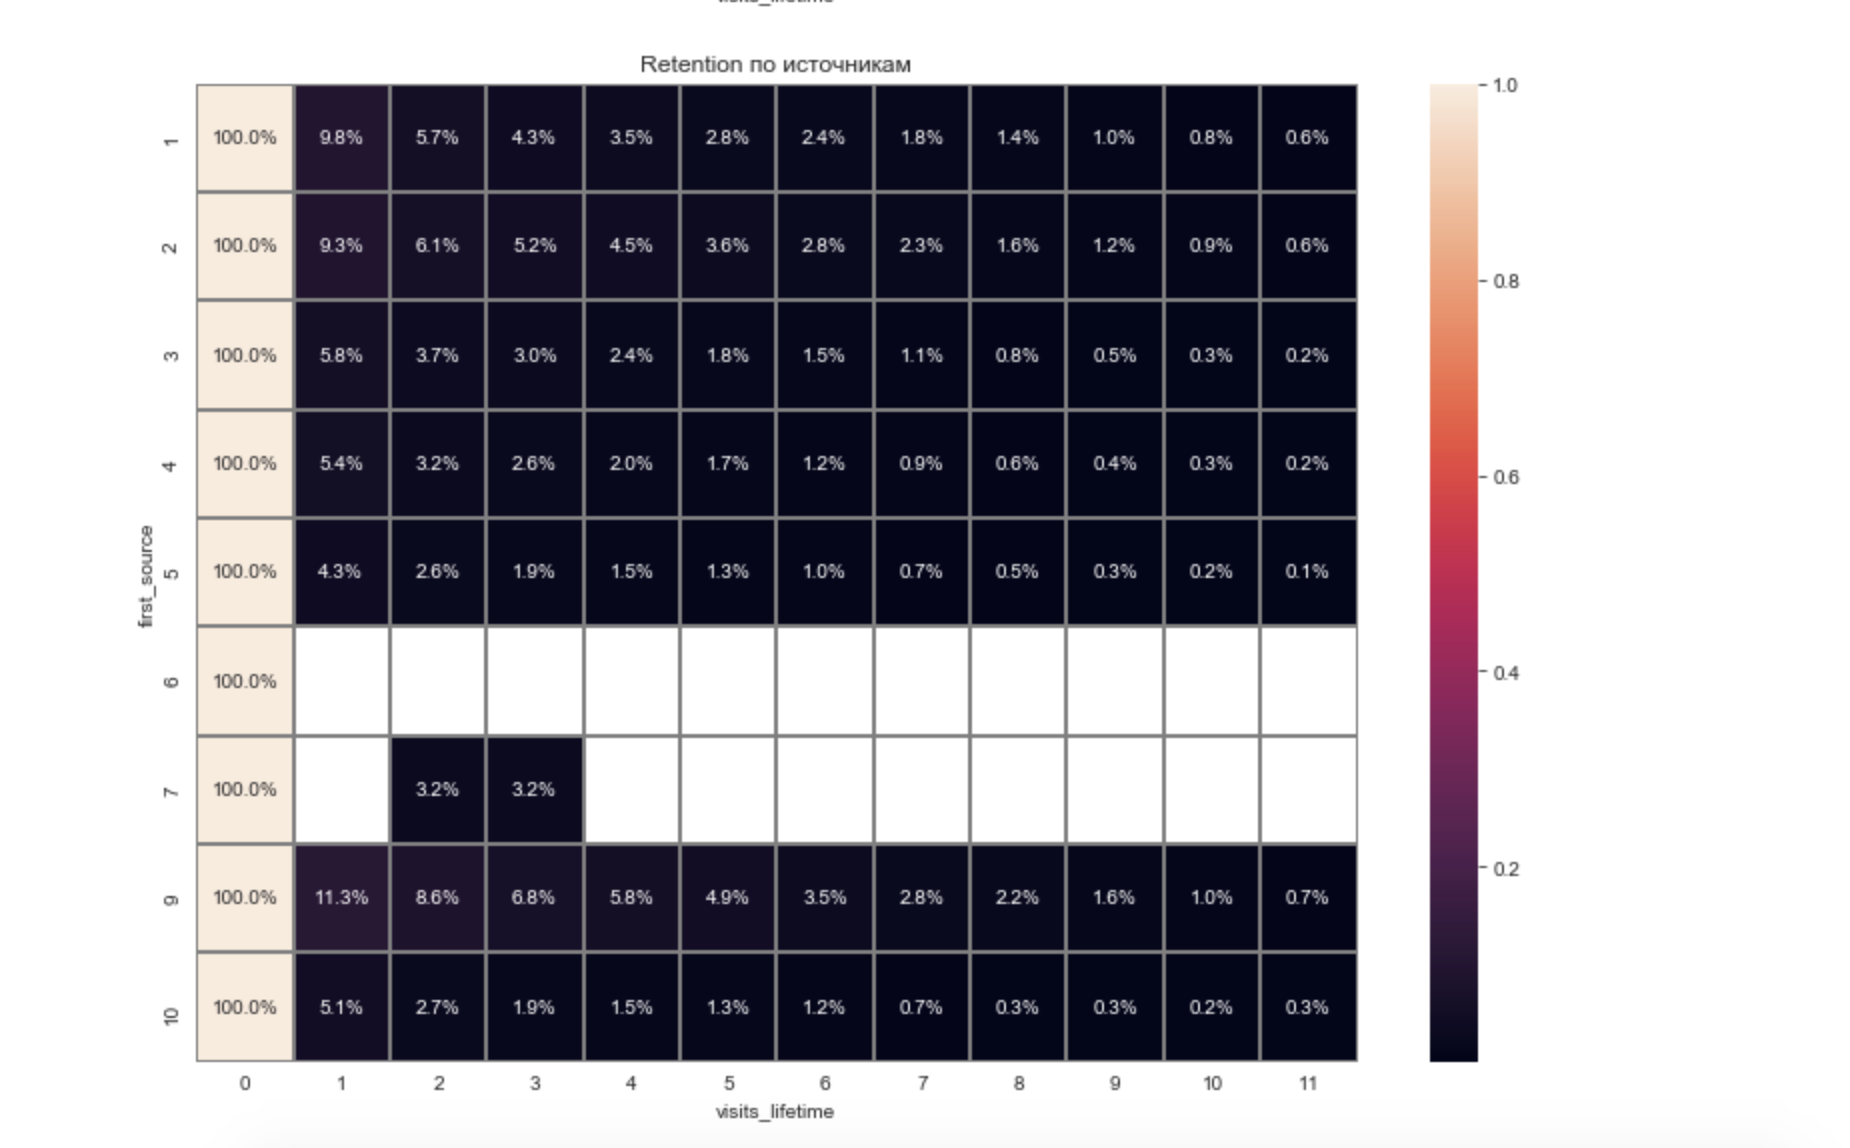

Чаще покупают: 1, 2, 5
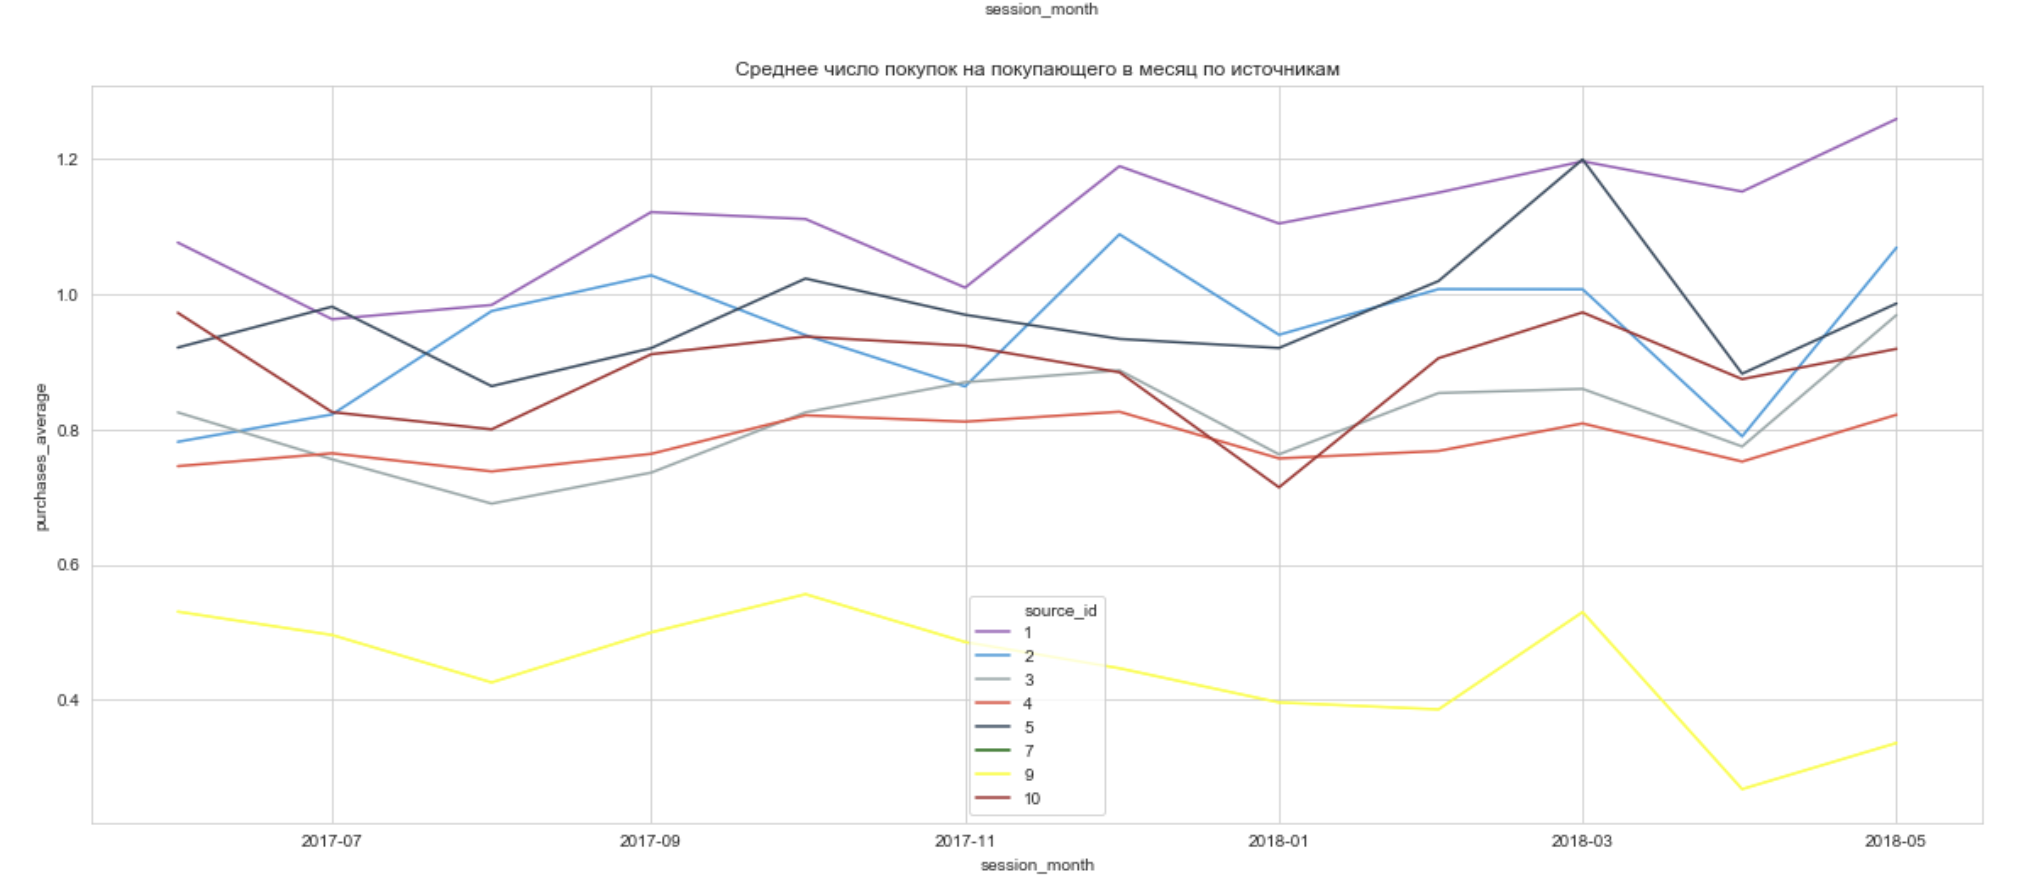

Самый большой средний чек: 1, 2, 5
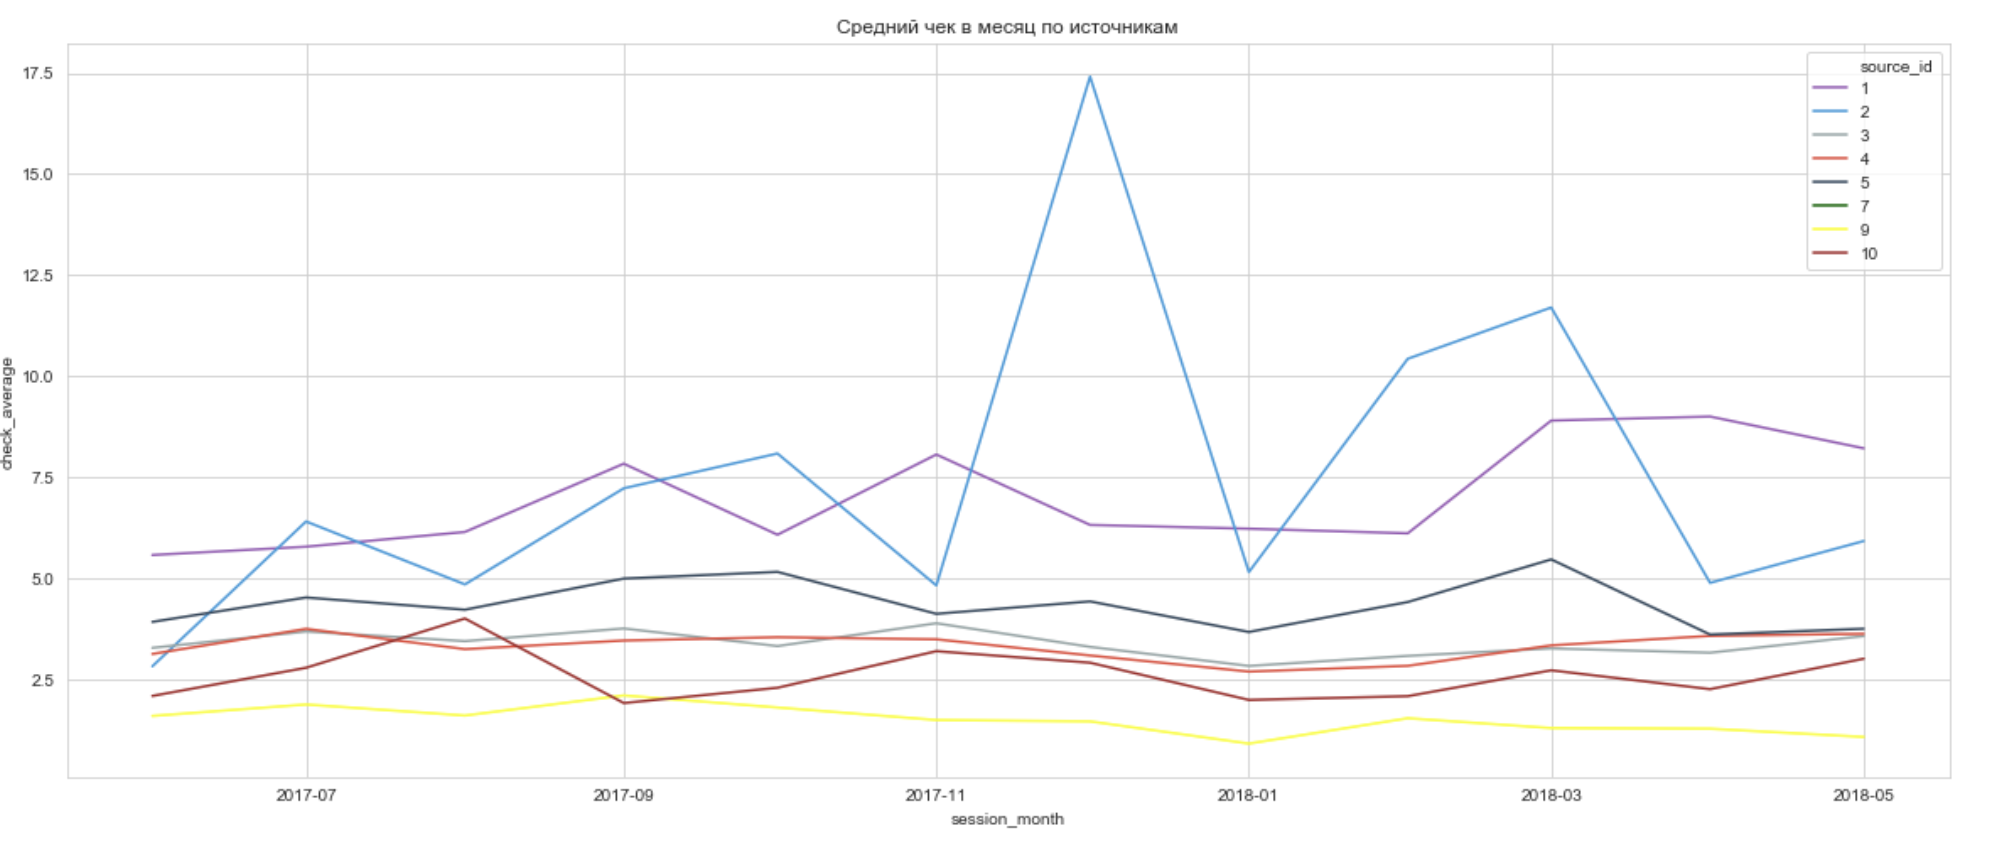

Больше всего приносят денег покупатели: 1,2,5
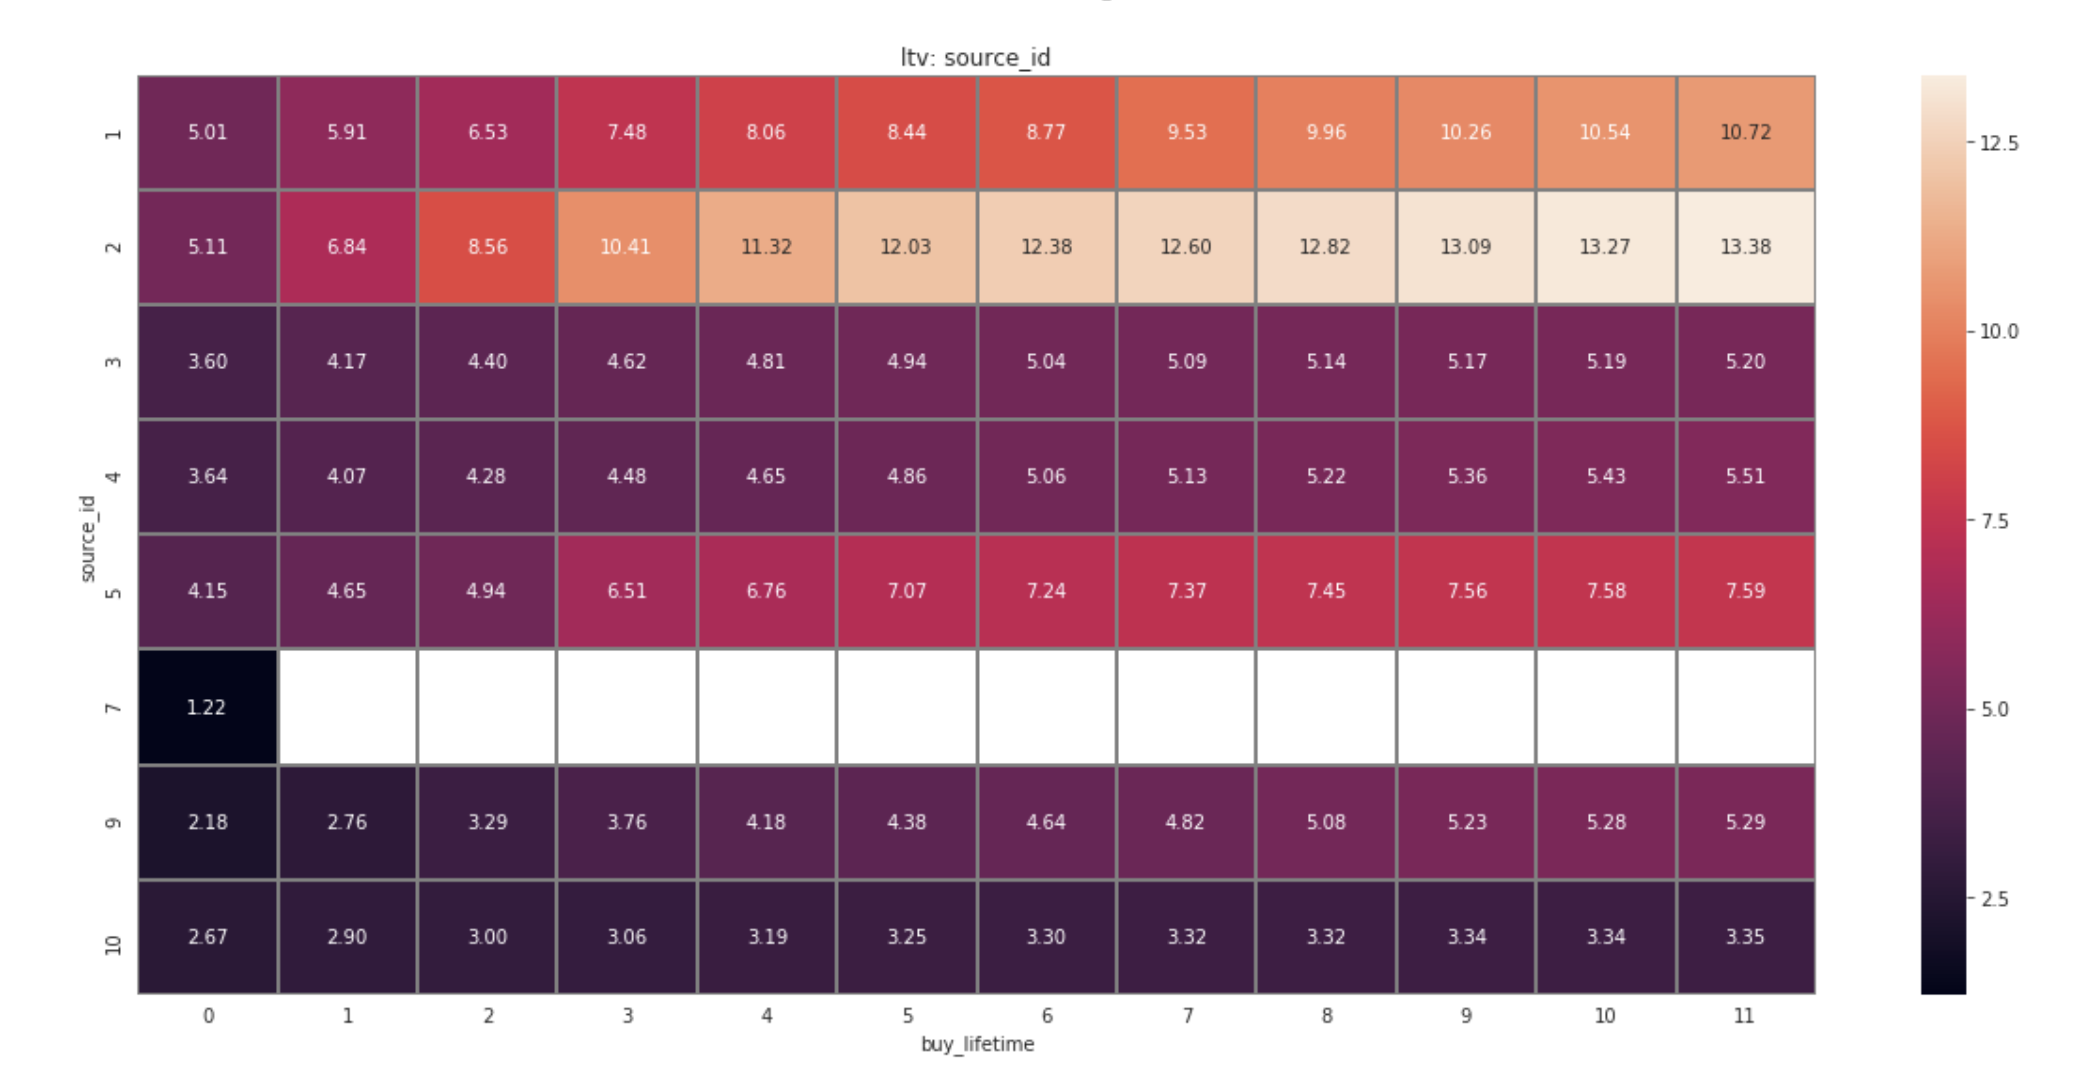

Больше всего потратили денег: 3 далее 4,5,2
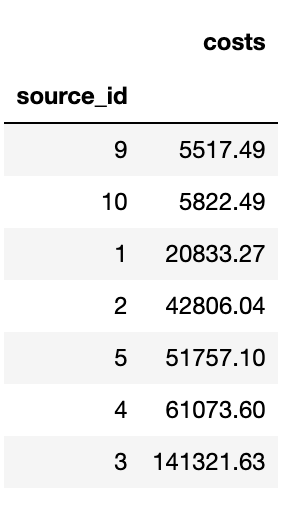

Самая высокая стоимость привлечения клиента: 3,2 и 5,1
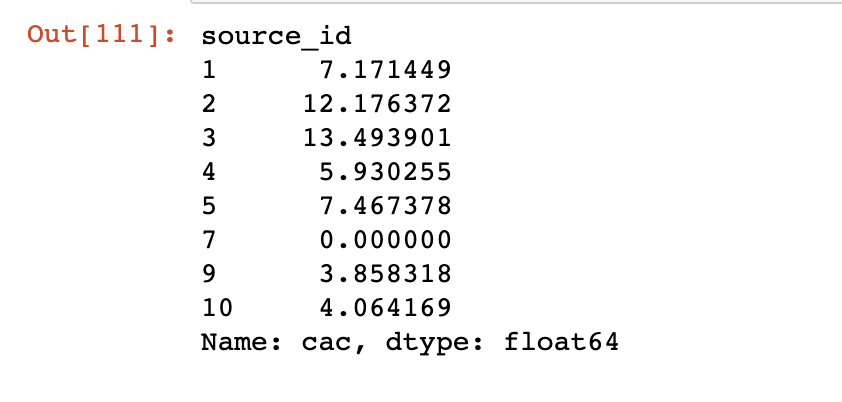

Возврат денег с инвестиций: 1 и 9
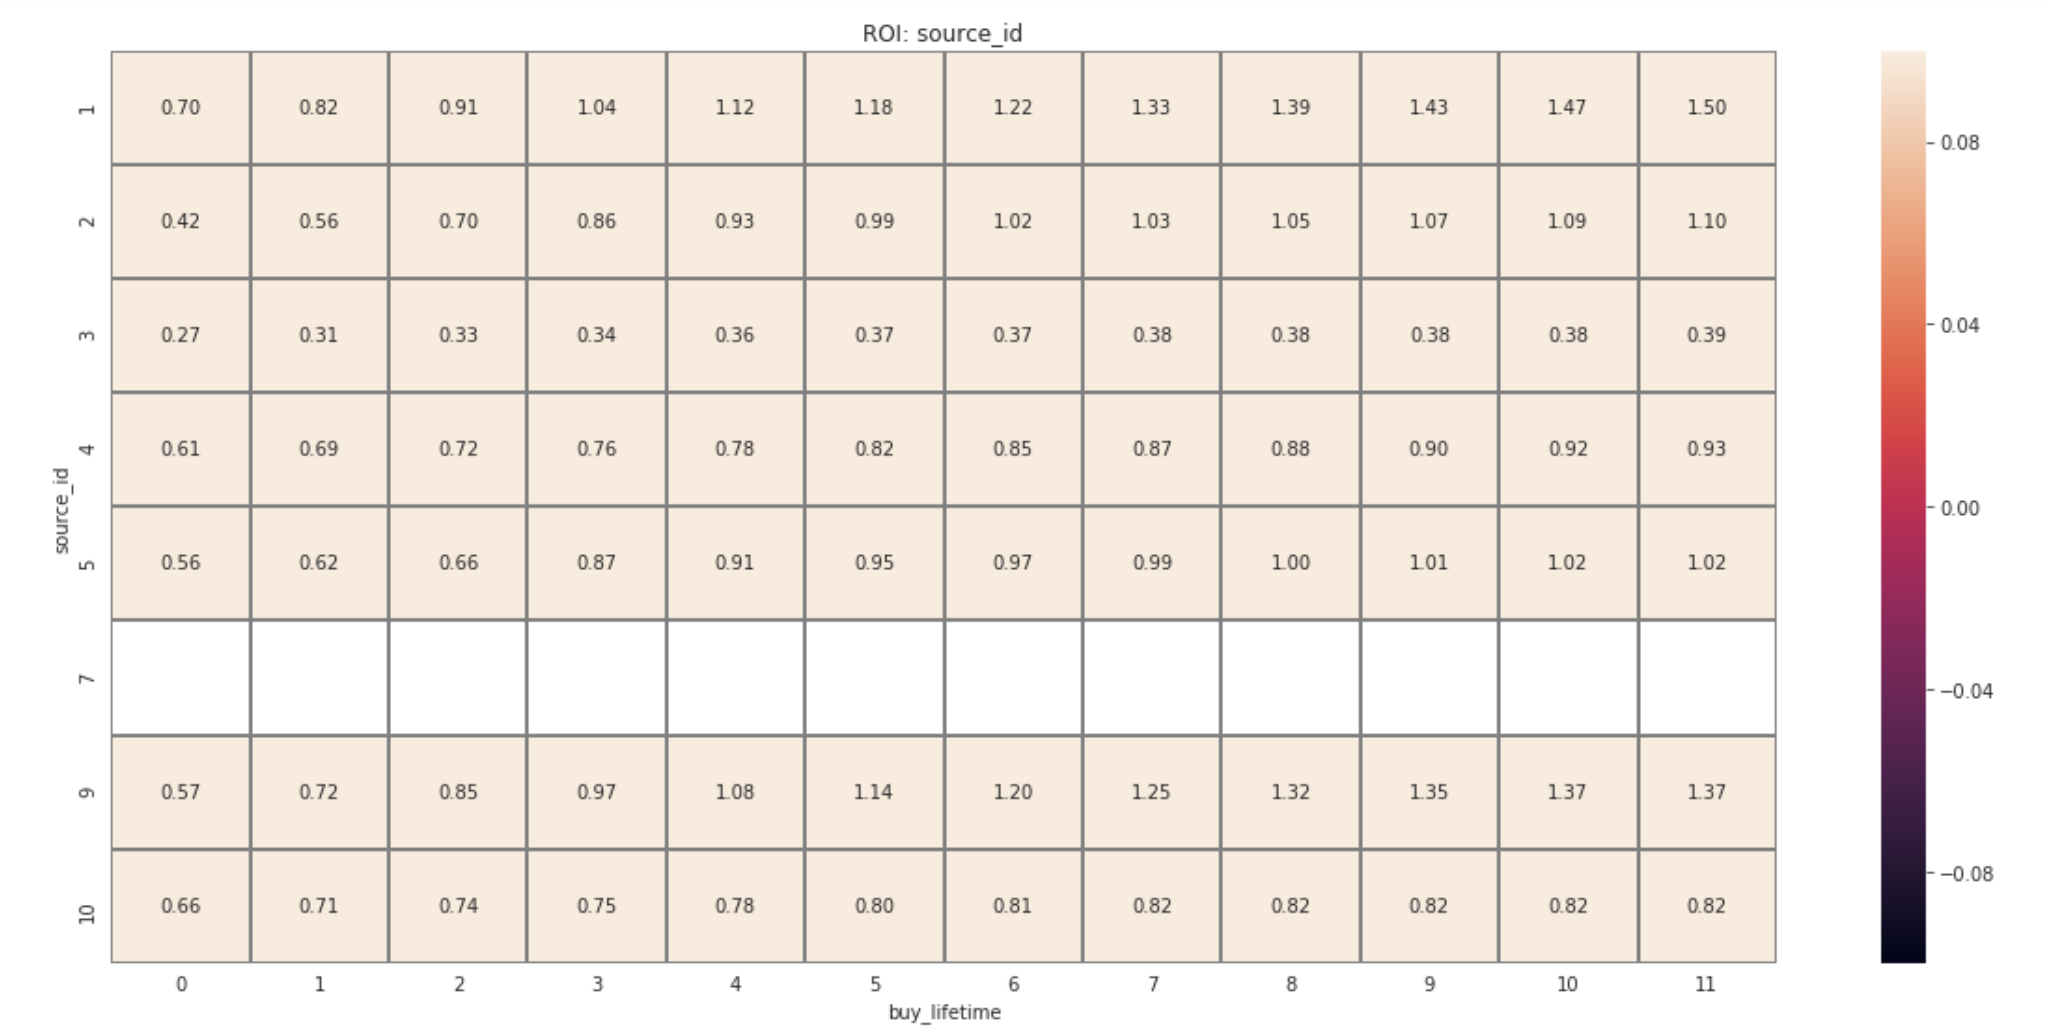


#### Самая главная тенденция 
пользователи заходят в большом количестве, лишь небольшая часть из них покупает (наверное, можно было бы это посчитать) в первый же день и далее очень мало пользователей возвращается. То есть фактически маркетинговые затраты идут на то, чтобы пользователь побыл на сайте день, и в течении этого дня иногда месяца совершил покупку. Но эти затраты гораздо больше, чем в итоге приносят пользователи. Стоит ли думать о том, чтобы пользователей удержать? Или это нормальное состояние сайта-афиши, куда люди заходят стихийно или по случаю того, что скоро концерт любимого исполнителя, покупают билет и не возвращаются. Можно ли в таком случае вообще удерживать пользователей. Возможно, компании стоит потратить силы на то, чтобы привлекать больше пользователей, которые бы с большей вероятностью совершили покупку, чтобы из впервые зашедших, покупало в итоге больше человек. Реклама на посещение сайта должна быть лучше старгетировна.  

 
Привлечение покупателей через источники окупилось для источников: **1, 2, 5, 9**  
Для 1 на 4м месяце жизни, для 2 на 6м месяце, для 5 на 8м месяце, для 9 на 4м месяце. При этом источники 5 на 11й месяц жизни приносит 2% дохода, **2й источник -- 10%, 1й -- 50%, 9й -- 37%.**  
У пользователей с источника 1 относительно невысокая посещаемость в месяц -- 1819 человек, наибольшая длительность сессий, наибольшее число покупок на покупателей, у них не самый большой retention, по затратам эта группа одна из наименьших. Видимо через этот источник удалось привлечь небольшое но покупающее количество пользователей.

Для источника 3 стоимость привлечения пользователя не окупилась и на 11 месяц жизни. На источник 3 было привлечено больше всего денег 141321 денежных единиц всего за весь период. С этого источника средняя посещаемость было 6759 пользоватаелей в месяц. Для сравнения, на самый успешный с точки зрения посещаемости канал 4 (7746 пользователей в месяц) было потрачено 61073 денежные единицы и это следующий максимум расходов. От этого источника надо отказаться.

Маркетологам стоит оставить источники 1, 9, 2

---

<div class="alert alert-block alert-danger">
    

### Комментарий от ревьюера

Интересная идея - добавить графики в выводы. Но для этого стоит проверить что у всех есть заголовок, легенда и сопроводить выводами. И возможно немного уменьшить размер, чтобы визуально можно было их оценить.
Не буду повторяться насчет метрик - все найденные в ходе исследования значения нужно продублировать в выводах.
    
Рекомендации маркетологам очень важны, возможно стоит расшилить этот раздел.
</div>

---


---

<div class="alert alert-block alert-warning">
    

### Комментарий от ревьюера V2

Спассибо за рекомендации маркетологам и конкретику в выводах. 

Постарайся в следующий раз текстовую информацию выводить не принтскринами, а в виде форматированных ячеек "markdown", они будут выглядеть аккуратнее.

Для графиков -- можно еще использвать кроссылки на те разделы, где есть эти графики.
    

</div>

---


---

<div class="alert alert-block alert-warning">
    

### Общий Комментарий от ревьюера

В целом у тебя получилась хорошая работа. Ты структурно пишешь код, сопровождаешь его комментариями, графики твои очень наглядные и уместные. Именно по ним я вижу что и в расчетах у тебя нет серьезных проблем. Есть недочет, связанный с подсчетами окупаемости -- из-за того что нужно зафиксировать одинаковое время жизни пользователя. Я думаю, ты его быстро поправишь. 

Осталось добавить выводы для каждого раздела, кратко изложить свои находки и важные метрики в общем выводе.

И главное, дать рекомендации маркетологам, они их очень ждут!
    
Очень жду новой версии)
</div>

---


---

<div class="alert alert-block alert-success">
    

### Общий Комментарий от ревьюера V2

Спасибо за доработки!

Критичных замечаний у меня не осталось -- работа зачтена!) </div>

---
